Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
rootpath = r"D:\ML\Augmented dataset"

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
import plotly
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from plotly.offline import iplot, init_notebook_mode
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet import ResNet50
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.layers import *
from keras.models import Model, load_model
from keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from keras import backend as K
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, Sequential
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

In [3]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 


In [4]:
import os
os.listdir(rootpath)

['Agitagueda art festival',
 'Baisakhi',
 'Bhandara',
 'Bihu',
 'Chapchar kut',
 'Christmas',
 'Diwali',
 'Ganesh Chathurthi',
 'Holi',
 'Jaipur Elephant Festival',
 'Krishna Jayanti',
 'Kumbhmela',
 'Lantern festival',
 'Maha Shivratri',
 'Onam',
 'Pongal',
 'Puli Kali',
 'Raksha Bandhan',
 'Ramzan',
 'Rath Yatri',
 'Thaipusam']

In [5]:
import os
os.listdir(os.path.join('D:\ML\Augmented dataset'))

['Agitagueda art festival',
 'Baisakhi',
 'Bhandara',
 'Bihu',
 'Chapchar kut',
 'Christmas',
 'Diwali',
 'Ganesh Chathurthi',
 'Holi',
 'Jaipur Elephant Festival',
 'Krishna Jayanti',
 'Kumbhmela',
 'Lantern festival',
 'Maha Shivratri',
 'Onam',
 'Pongal',
 'Puli Kali',
 'Raksha Bandhan',
 'Ramzan',
 'Rath Yatri',
 'Thaipusam']

In [6]:
train=[]
label=[]

for i in os.listdir(rootpath):
    if i != '.DS_Store':
     train_class=os.listdir(os.path.join(rootpath,i))
     k=0
     for j in train_class:
         #if k<50:
          img=os.path.join(rootpath,i,j)
          train.append(img)
          label.append(i)
          k=k+1
        

print('Number of train images={}'.format(len(train)))

Number of train images=82963


In [7]:
train



['D:\\ML\\Augmented dataset\\Agitagueda art festival\\pic__0_1267.jpeg',
 'D:\\ML\\Augmented dataset\\Agitagueda art festival\\pic__0_1388.jpeg',
 'D:\\ML\\Augmented dataset\\Agitagueda art festival\\pic__0_1646.jpeg',
 'D:\\ML\\Augmented dataset\\Agitagueda art festival\\pic__0_1778.jpeg',
 'D:\\ML\\Augmented dataset\\Agitagueda art festival\\pic__0_1815.jpeg',
 'D:\\ML\\Augmented dataset\\Agitagueda art festival\\pic__0_2714.jpeg',
 'D:\\ML\\Augmented dataset\\Agitagueda art festival\\pic__0_3216.jpeg',
 'D:\\ML\\Augmented dataset\\Agitagueda art festival\\pic__0_3443.jpeg',
 'D:\\ML\\Augmented dataset\\Agitagueda art festival\\pic__0_363.jpeg',
 'D:\\ML\\Augmented dataset\\Agitagueda art festival\\pic__0_397.jpeg',
 'D:\\ML\\Augmented dataset\\Agitagueda art festival\\pic__0_4017.jpeg',
 'D:\\ML\\Augmented dataset\\Agitagueda art festival\\pic__0_4597.jpeg',
 'D:\\ML\\Augmented dataset\\Agitagueda art festival\\pic__0_4692.jpeg',
 'D:\\ML\\Augmented dataset\\Agitagueda art festival\

In [8]:
label

['Agitagueda art festival',
 'Agitagueda art festival',
 'Agitagueda art festival',
 'Agitagueda art festival',
 'Agitagueda art festival',
 'Agitagueda art festival',
 'Agitagueda art festival',
 'Agitagueda art festival',
 'Agitagueda art festival',
 'Agitagueda art festival',
 'Agitagueda art festival',
 'Agitagueda art festival',
 'Agitagueda art festival',
 'Agitagueda art festival',
 'Agitagueda art festival',
 'Agitagueda art festival',
 'Agitagueda art festival',
 'Agitagueda art festival',
 'Agitagueda art festival',
 'Agitagueda art festival',
 'Agitagueda art festival',
 'Agitagueda art festival',
 'Agitagueda art festival',
 'Agitagueda art festival',
 'Agitagueda art festival',
 'Agitagueda art festival',
 'Agitagueda art festival',
 'Agitagueda art festival',
 'Agitagueda art festival',
 'Agitagueda art festival',
 'Agitagueda art festival',
 'Agitagueda art festival',
 'Agitagueda art festival',
 'Agitagueda art festival',
 'Agitagueda art festival',
 'Agitagueda art fes

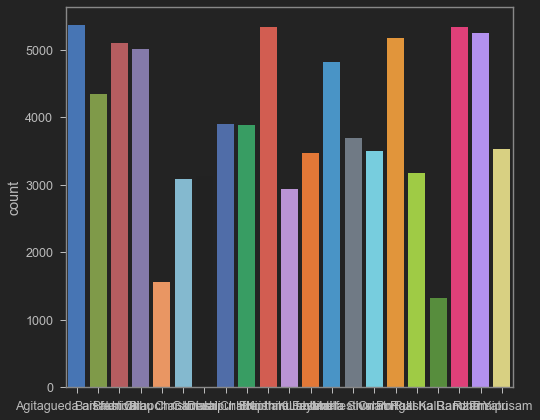

In [9]:
sns.countplot(label)

IndexError: index 5 is out of bounds for axis 0 with size 5

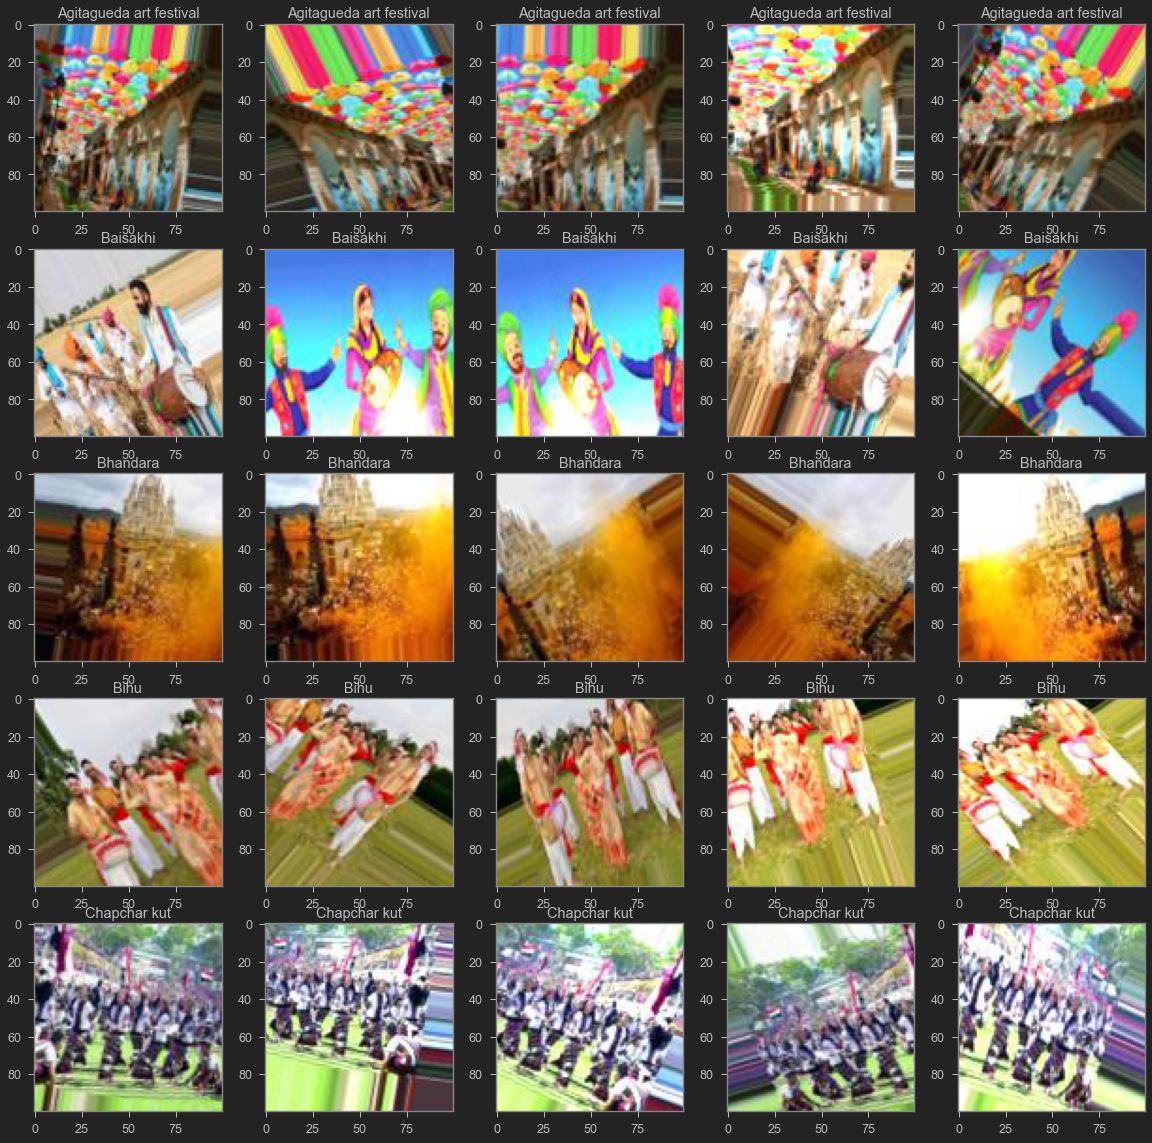

In [10]:
fig, axs = plt.subplots(5,5,figsize=(20,20))
count = 0
for i in os.listdir(rootpath):
  if i != '.DS_Store':

    train_class=os.listdir(os.path.join(rootpath,i))
    for j in range(5):
         img=os.path.join(rootpath,i,train_class[j])
         img=PIL.Image.open(img)
         axs[count][j].title.set_text(i)
         axs[count][j].imshow(img)
    count+=1

fig.tight_layout()

In [11]:
No_images_per_class=[]
Class_name=[]
for i in os.listdir(rootpath):
    if i != '.DS_Store':

      train_class=os.listdir(os.path.join(rootpath,i))
      No_images_per_class.append(len(train_class))
      Class_name.append(i)
      print('Number of images in {} = {}\n'.format(i,len(train_class)))

Number of images in Agitagueda art festival = 5368

Number of images in Baisakhi = 4339

Number of images in Bhandara = 5096

Number of images in Bihu = 5015

Number of images in Chapchar kut = 1562

Number of images in Christmas = 3081

Number of images in Diwali = 3129

Number of images in Ganesh Chathurthi = 3900

Number of images in Holi = 3890

Number of images in Jaipur Elephant Festival = 5337

Number of images in Krishna Jayanti = 2939

Number of images in Kumbhmela = 3479

Number of images in Lantern festival = 4826

Number of images in Maha Shivratri = 3699

Number of images in Onam = 3497

Number of images in Pongal = 5180

Number of images in Puli Kali = 3174

Number of images in Raksha Bandhan = 1322

Number of images in Ramzan = 5340

Number of images in Rath Yatri = 5255

Number of images in Thaipusam = 3535



In [12]:
retina_df = pd.DataFrame({'Image':train,'Labels':label})
retina_df

Image  \
0      D:\ML\Augmented dataset\Agitagueda art festiva...   
1      D:\ML\Augmented dataset\Agitagueda art festiva...   
2      D:\ML\Augmented dataset\Agitagueda art festiva...   
3      D:\ML\Augmented dataset\Agitagueda art festiva...   
4      D:\ML\Augmented dataset\Agitagueda art festiva...   
...                                                  ...   
82958  D:\ML\Augmented dataset\Thaipusam\pic__9_8505....   
82959  D:\ML\Augmented dataset\Thaipusam\pic__9_9167....   
82960  D:\ML\Augmented dataset\Thaipusam\pic__9_9410....   
82961  D:\ML\Augmented dataset\Thaipusam\pic__9_9637....   
82962  D:\ML\Augmented dataset\Thaipusam\pic__9_9806....   

                        Labels  
0      Agitagueda art festival  
1      Agitagueda art festival  
2      Agitagueda art festival  
3      Agitagueda art festival  
4      Agitagueda art festival  
...                        ...  
82958                Thaipusam  
82959                Thaipusam  
82960                Thaipusam  
82961                Thaipusam  
82962                Thaipusam  

[82963 rows x 2 columns]

([<matplotlib.patches.Wedge at 0x24dc245ba30>,
 [Text(1.0773523791757584, 0.22206271880784756, 'Agitagueda art festival'),
  Text(0.9255856166466142, 0.5943830972166916, 'Baisakhi'),
  Text(0.6592653155396282, 0.8805505344535511, 'Bhandara'),
  Text(0.28256458258148925, 1.063088546016064, 'Bihu'),
  Text(0.011808721767200943, 1.0999366136692719, 'Chapchar kut'),
  Text(-0.18076751173380837, 1.085045209519662, 'Christmas'),
  Text(-0.42860272275163946, 1.013064512284327, 'Diwali'),
  Text(-0.6799842927735567, 0.8646510056556033, 'Ganesh Chathurthi'),
  Text(-0.9019907488609399, 0.629613126427079, 'Holi'),
  Text(-1.0630296691553685, 0.28278600123667386, 'Jaipur Elephant Festival'),
  Text(-1.0984324243022816, -0.05870442267335995, 'Krishna Jayanti'),
  Text(-1.0520252435391966, -0.3213143117825506, 'Kumbhmela'),
  Text(-0.9010360582567417, -0.6309786222378329, 'Lantern festival'),
  Text(-0.6543200475688395, -0.8842314602803453, 'Maha Shivratri'),
  Text(-0.39220065043216545, -1.0277055

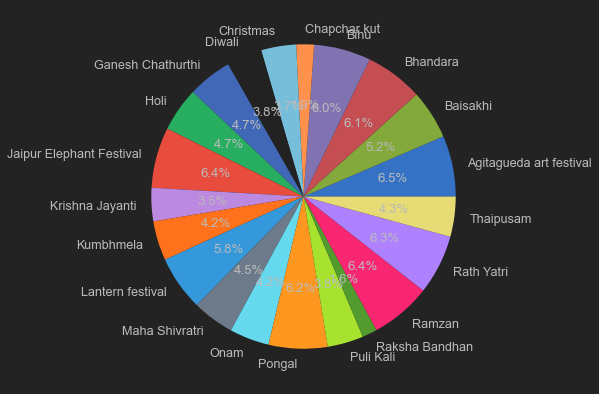

In [13]:
fig1,ax1=plt.subplots()
ax1.pie(No_images_per_class,labels=Class_name,autopct='%1.1f%%')

In [14]:
retina_df=shuffle(retina_df)
train,test=train_test_split(retina_df,test_size=0.2)

In [15]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    validation_split=0.15)
test_datagen=ImageDataGenerator(rescale=1./255)

In [16]:
train_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col='Labels',
    target_size=(256,256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=128,
    subset='training')

Found 56415 validated image filenames belonging to 21 classes.


In [17]:
validation_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col='Labels',
    target_size=(256,256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=128,
    subset='validation')

Found 9955 validated image filenames belonging to 21 classes.


In [18]:
test_generator = train_datagen.flow_from_dataframe(
    test,
    directory='./',
    x_col="Image",
    y_col='Labels',
    target_size=(256,256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=128)

Found 16593 validated image filenames belonging to 21 classes.


In [ ]:
#WEEK 9

In [19]:
def res_block(X, filter, stage):
  
  # Convolutional_block
  X_copy = X

  f1 , f2, f3 = filter
    
  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 1
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 2
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [20]:
input_shape = (256,256,3)


X_input = Input(input_shape)



X = ZeroPadding2D((3,3))(X_input)

# 1 - stage

X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2- stage

X = res_block(X, filter= [64,64,256], stage= 2)

# 3- stage

X = res_block(X, filter= [128,128,512], stage= 3)

# 4- stage

X = res_block(X, filter= [256,256,1024], stage= 4)

# # 5- stage

# Average Pooling

X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

# Final layer

X = Flatten()(X)
X = Dense(21, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)


model = Model( inputs= X_input, outputs = X, name = 'Resnet50')

model.summary()

Model: "Resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1 (Conv2D)                 (None, 128, 128, 64  9472        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                           

 res_2_identity_2_b (Conv2D)    (None, 31, 31, 64)   36928       ['activation_7[0][0]']           
                                                                                                  
 bn_2_identity_2_b (BatchNormal  (None, 31, 31, 64)  256         ['res_2_identity_2_b[0][0]']     
 ization)                                                                                         
                                                                                                  
 activation_8 (Activation)      (None, 31, 31, 64)   0           ['bn_2_identity_2_b[0][0]']      
                                                                                                  
 res_2_identity_2_c (Conv2D)    (None, 31, 31, 256)  16640       ['activation_8[0][0]']           
                                                                                                  
 bn_2_identity_2_c (BatchNormal  (None, 31, 31, 256)  1024       ['res_2_identity_2_c[0][0]']     
 ization) 

 bn_3_identity_2_b (BatchNormal  (None, 15, 15, 128)  512        ['res_3_identity_2_b[0][0]']     
 ization)                                                                                         
                                                                                                  
 activation_17 (Activation)     (None, 15, 15, 128)  0           ['bn_3_identity_2_b[0][0]']      
                                                                                                  
 res_3_identity_2_c (Conv2D)    (None, 15, 15, 512)  66048       ['activation_17[0][0]']          
                                                                                                  
 bn_3_identity_2_c (BatchNormal  (None, 15, 15, 512)  2048       ['res_3_identity_2_c[0][0]']     
 ization)                                                                                         
                                                                                                  
 add_5 (Ad

 ization)                                                                                         
                                                                                                  
 activation_26 (Activation)     (None, 7, 7, 256)    0           ['bn_4_identity_2_b[0][0]']      
                                                                                                  
 res_4_identity_2_c (Conv2D)    (None, 7, 7, 1024)   263168      ['activation_26[0][0]']          
                                                                                                  
 bn_4_identity_2_c (BatchNormal  (None, 7, 7, 1024)  4096        ['res_4_identity_2_c[0][0]']     
 ization)                                                                                         
                                                                                                  
 add_8 (Add)                    (None, 7, 7, 1024)   0           ['bn_4_identity_2_c[0][0]',      
          

In [21]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])


In [22]:
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

#save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath="weights-copy2.hdf5", verbose=1, save_best_only=True)

In [24]:
history = model.fit(train_generator, steps_per_epoch = train_generator.n // 128, epochs = 20, validation_data= validation_generator, validation_steps= validation_generator.n // 128, callbacks=[checkpointer , earlystopping])

Epoch 1/20
440/440 [==============================] - ETA: 0s - loss: 0.7934 - accuracy: 0.7557 
Epoch 1: val_loss improved from 1.75090 to 0.92794, saving model to weights-copy2.hdf5
440/440 [==============================] - 5200s 12s/step - loss: 0.7934 - accuracy: 0.7557 - val_loss: 0.9279 - val_accuracy: 0.7081
Epoch 2/20
440/440 [==============================] - ETA: 0s - loss: 0.4346 - accuracy: 0.8619 
Epoch 2: val_loss improved from 0.92794 to 0.65983, saving model to weights-copy2.hdf5
440/440 [==============================] - 5185s 12s/step - loss: 0.4346 - accuracy: 0.8619 - val_loss: 0.6598 - val_accuracy: 0.7939
Epoch 3/20
440/440 [==============================] - ETA: 0s - loss: 0.2503 - accuracy: 0.9186 
Epoch 3: val_loss did not improve from 0.65983
440/440 [==============================] - 5243s 12s/step - loss: 0.2503 - accuracy: 0.9186 - val_loss: 0.6721 - val_accuracy: 0.8084
Epoch 4/20
440/440 [==============================] - ETA: 0s - loss: 0.1660 - accurac

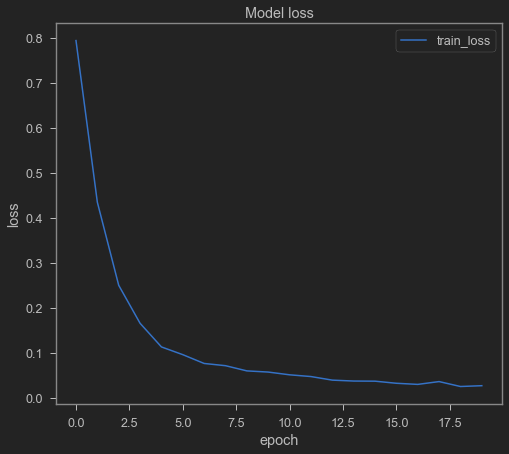

In [25]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [29]:
import h5py
model.load_weights("weights-copy2.hdf5")
#model.load_weights(rootpath+"retina_w.hdf5")
evaluate = model.evaluate(test_generator, steps = test_generator.n // 128, verbose =1)

print('Accuracy Test : {}'.format(evaluate[1]))

129/129 [==============================] - 435s 3s/step - loss: 0.1240 - accuracy: 0.9671
Accuracy Test : 0.9671148061752319


In [30]:
labels = {0: 'Agitagueda art festival', 1: 'Baisakhi', 2: 'Bhandara', 3:'Bihu', 4: 'Chapchar Kut', 5: 'Christmas', 6: 'Diwali', 7: 'Ganesh Chathurthi', 8:'Holi', 9:'Jaipur Elephant festival', 10:'Krishna Jayanti', 11:'Kumbhmela', 12:'Lantern festival', 13:'Maha Shivratri', 14:'Onam', 15:'Pongal', 16:'Puli kali', 17:'Raksha Bandhan', 18:'Ramzan', 19:'Rath Yatri', 20:'Thaipusam'}

In [31]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import cv2

prediction = []
original = []
image = []
count = 0

for item in range(len(test)):
  # code to open the image
  img= PIL.Image.open(test['Image'].tolist()[item])
  # resizing the image to (256,256)
  img = img.resize((256,256))
  # appending image to the image list
  image.append(img)
  # converting image to array
  img = np.asarray(img, dtype= np.float32)
 
  # normalizing the image
  img = img / 255
  print(img.shape)
  if(img.shape == (256,256,3) ):
    # reshaping the image in to a 4D array
    img = img.reshape(-1,256,256,3)
    # making prediction of the model
    predict = model.predict(img)
    # getting the index corresponding to the highest value in the prediction
    predict = np.argmax(predict)
    # appending the predicted class to the list
    prediction.append(labels[predict])
    # appending original class to the list
    original.append(test['Labels'].tolist()[item])

(256, 256, 3)
1/1 [==============================] - 0s 57ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 40ms/step
(256, 256, 3)
1/1 [==============================] - 0s 40ms/step
(256, 256, 3)
1/1 [==============================] - 0s 39ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 41ms/step
(256, 256, 3)
1/1 [==============================] - 0s 38ms/step
(256, 256, 3)
1/1 [==============================] - 0s 38ms/step
(256, 256, 3)
1/1 [==============================] - 0s 38ms/step
(256, 256, 3)
1/1 [==============================] - 0s 37ms/step
(256, 256, 3)
1/1 [==============================] - 0s 39ms/step
(256, 256, 3)
1/1 [==============================] - 0s 38ms/step
(256, 256, 3)
1/1 [==============================] - 0s 39ms/step
(256, 256,

(256, 256, 3)
1/1 [==============================] - 0s 42ms/step
(256, 256, 3)
1/1 [==============================] - 0s 43ms/step
(256, 256, 3)
1/1 [==============================] - 0s 43ms/step
(256, 256, 3)
1/1 [==============================] - 0s 42ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 42ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 43ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 42ms/step
(256, 256, 3)
1/1 [==============================] - 0s 41ms/step
(256, 256, 3)
1/1 [==============================] - 0s 42ms/step
(256, 256,

1/1 [==============================] - 0s 43ms/step
(256, 256, 3)
1/1 [==============================] - 0s 42ms/step
(256, 256, 3)
1/1 [==============================] - 0s 43ms/step
(256, 256, 3)
1/1 [==============================] - 0s 41ms/step
(256, 256, 3)
1/1 [==============================] - 0s 43ms/step
(256, 256, 3)
1/1 [==============================] - 0s 41ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 41ms/step
(256, 256, 3)
1/1 [==============================] - 0s 41ms/step
(256, 256, 3)
1/1 [==============================] - 0s 42ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 42ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 42ms/step
(256, 256, 3)
1/1 [==============================] - 0s 41ms/step
(256, 256, 3)
1/1 [==============================] - 0s 40ms/step
(256, 256, 3)
1/1 [==============================] - 0s 43ms/step
(256, 256, 3)
1/1 [==============================] - 0s 43ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 42ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 56ms/step
(256, 256, 3)
1/1 [==============================] - 0s 58ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 40ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 43ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 39ms/step
(256, 256, 3)
1/1 [==============================] - 0s 38ms/step
(256, 256, 3)
1/1 [==============================] - 0s 40ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 41ms/step
(256, 256, 3)
1/1 [==============================] - 0s 40ms/step
(256, 256, 3)
1/1 [==============================] - 0s 42ms/step
(256, 256, 3)
1/1 [==============================] - 0s 40ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 42ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 41ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 39ms/step
(256, 256, 3)
1/1 [==============================] - 0s 43ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 41ms/step
(256, 256, 3)
1/1 [==============================] - 0s 39ms/step
(256, 256, 3)
1/1 [==============================] - 0s 39ms/step
(256, 256, 3)
1/1 [==============================] - 0s 40ms/step
(256, 256, 3)
1/1 [==============================] - 0s 43ms/step
(256, 256, 3)
1/1 [==============================] - 0s 41ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 39ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 41ms/step
(256, 256, 3)
1/1 [==============================] - 0s 40ms/step
(256, 256, 3)
1/1 [==============================] - 0s 41ms/step
(256, 256, 3)
1/1 [==============================] - 0s 43ms/step
(256, 256, 3)
1/1 [==============================] - 0s 39ms/step
(256, 256, 3)
1/1 [==============================] - 0s 38ms/step
(256, 256, 3)
1/1 [==============================] - 0s 38ms/step
(256, 256, 3)
1/1 [==============================] - 0s 39ms/step
(256, 256, 3)
1/1 [==============================] - 0s 42ms/step
(256, 256, 3)
1/1 [==============================] - 0s 40ms/step
(256, 256, 3)
1/1 [==============================] - 0s 41ms/step
(256, 256, 3)
1/1 [==============================] - 0s 40ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 43ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 43ms/step
(256, 256, 3)
1/1 [==============================] - 0s 42ms/step
(256, 256, 3)
1/1 [==============================] - 0s 42ms/step
(256, 256, 3)
1/1 [==============================] - 0s 42ms/step
(256, 256, 3)
1/1 [==============================] - 0s 43ms/step
(256, 256, 3)
1/1 [==============================] - 0s 42ms/step
(256, 256, 3)
1/1 [==============================] - 0s 42ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 43ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 43ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 43ms/step
(256, 256, 3)
1/1 [==============================] - 0s 43ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 43ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 43ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 59ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 42ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 43ms/step
(256, 256, 3)
1/1 [==============================] - 0s 43ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 43ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 56ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 43ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 57ms/step
(256, 256, 3)
1/1 [==============================] - 0s 43ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 43ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 57ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 56ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 56ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 58ms/step
(256, 256, 3)
1/1 [==============================] - 0s 57ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 56ms/step
(256, 256, 3)
1/1 [==============================] - 0s 62ms/step
(256, 256, 3)
1/1 [==============================] - 0s 60ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 56ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 44ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 43ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 43ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 46ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 60ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 47ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 67ms/step
(256, 256, 3)
1/1 [==============================] - 0s 69ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 60ms/step
(256, 256, 3)
1/1 [==============================] - 0s 58ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 59ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 59ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 58ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 59ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 57ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 56ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 57ms/step
(256, 256, 3)
1/1 [==============================] - 0s 60ms/step
(256, 256, 3)
1/1 [==============================] - 0s 64ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 56ms/step
(256, 256, 3)
1/1 [==============================] - 0s 57ms/step
(256, 256, 3)
1/1 [==============================] - 0s 57ms/step
(256, 256, 3)
1/1 [==============================] - 0s 57ms/step
(256, 256, 3)
1/1 [==============================] - 0s 61ms/step
(256, 256, 3)
1/1 [==============================] - 0s 74ms/step
(256, 256, 3)
1/1 [==============================] - 0s 57ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 56ms/step
(256, 256, 3)
1/1 [==============================] - 0s 57ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 62ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 57ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 60ms/step
(256, 256, 3)
1/1 [==============================] - 0s 57ms/step
(256, 256, 3)
1/1 [==============================] - 0s 58ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 58ms/step
(256, 256, 3)
1/1 [==============================] - 0s 58ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 57ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 60ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 61ms/step
(256, 256, 3)
1/1 [==============================] - 0s 65ms/step
(256, 256, 3)
1/1 [==============================] - 0s 59ms/step
(256, 256, 3)
1/1 [==============================] - 0s 61ms/step
(256, 256, 3)
1/1 [==============================] - 0s 64ms/step
(256, 256, 3)
1/1 [==============================] - 0s 63ms/step
(256, 256, 3)
1/1 [==============================] - 0s 58ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 61ms/step
(256, 256, 3)
1/1 [==============================] - 0s 61ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 56ms/step
(256, 256, 3)
1/1 [==============================] - 0s 57ms/step
(256, 256, 3)
1/1 [==============================] - 0s 59ms/step
(256, 256, 3)
1/1 [==============================] - 0s 56ms/step
(256, 256, 3)
1/1 [==============================] - 0s 58ms/step
(256, 256, 3)
1/1 [==============================] - 0s 56ms/step
(256, 256, 3)
1/1 [==============================] - 0s 57ms/step
(256, 256, 3)
1/1 [==============================] - 0s 62ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 61ms/step
(256, 256, 3)
1/1 [==============================] - 0s 59ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 59ms/step
(256, 256, 3)
1/1 [==============================] - 0s 59ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 67ms/step
(256, 256, 3)
1/1 [==============================] - 0s 58ms/step
(256, 256, 3)
1/1 [==============================] - 0s 58ms/step
(256, 256, 3)
1/1 [==============================] - 0s 60ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 57ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 56ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 61ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 56ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 57ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 57ms/step
(256, 256, 3)
1/1 [==============================] - 0s 61ms/step
(256, 256, 3)
1/1 [==============================] - 0s 57ms/step
(256, 256, 3)
1/1 [==============================] - 0s 57ms/step
(256, 256, 3)
1/1 [==============================] - 0s 59ms/step
(256, 256, 3)
1/1 [==============================] - 0s 61ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 58ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 64ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 57ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 56ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 58ms/step
(256, 256, 3)
1/1 [==============================] - 0s 63ms/step
(256, 256, 3)
1/1 [==============================] - 0s 56ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 61ms/step
(256, 256, 3)
1/1 [==============================] - 0s 69ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 67ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 56ms/step
(256, 256, 3)
1/1 [==============================] - 0s 64ms/step
(256, 256, 3)
1/1 [==============================] - 0s 61ms/step
(256, 256, 3)
1/1 [==============================] - 0s 59ms/step
(256, 256, 3)
1/1 [==============================] - 0s 58ms/step
(256, 256, 3)
1/1 [==============================] - 0s 58ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 56ms/step
(256, 256, 3)
1/1 [==============================] - 0s 66ms/step
(256, 256, 3)
1/1 [==============================] - 0s 63ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 59ms/step
(256, 256, 3)
1/1 [==============================] - 0s 57ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 56ms/step
(256, 256, 3)
1/1 [==============================] - 0s 56ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 59ms/step
(256, 256, 3)
1/1 [==============================] - 0s 70ms/step
(256, 256, 3)
1/1 [==============================] - 0s 61ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 58ms/step
(256, 256, 3)
1/1 [==============================] - 0s 60ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 56ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 67ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 57ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 68ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 51ms/step
(256, 256, 3)
1/1 [==============================] - 0s 60ms/step
(256, 256, 3)
1/1 [==============================] - 0s 59ms/step
(256, 256, 3)
1/1 [==============================] - 0s 52ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 65ms/step
(256, 256, 3)
1/1 [==============================] - 0s 66ms/step
(256, 256, 3)
1/1 [==============================] - 0s 64ms/step
(256, 256, 3)
1/1 [==============================] - 0s 65ms/step
(256, 256, 3)
1/1 [==============================] - 0s 65ms/step
(256, 256, 3)
1/1 [==============================] - 0s 67ms/step
(256, 256, 3)
1/1 [==============================] - 0s 65ms/step
(256, 256, 3)
1/1 [==============================] - 0s 59ms/step
(256, 256, 3)
1/1 [==============================] - 0s 57ms/step
(256, 256, 3)
1/1 [==============================] - 0s 63ms/step
(256, 256, 3)
1/1 [==============================] - 0s 60ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 54ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 67ms/step
(256, 256, 3)
1/1 [==============================] - 0s 60ms/step
(256, 256, 3)
1/1 [==============================] - 0s 58ms/step
(256, 256, 3)
1/1 [==============================] - 0s 58ms/step
(256, 256, 3)
1/1 [==============================] - 0s 58ms/step
(256, 256, 3)
1/1 [==============================] - 0s 58ms/step
(256, 256, 3)
1/1 [==============================] - 0s 57ms/step
(256, 256, 3)
1/1 [==============================] - 0s 58ms/step
(256, 256, 3)
1/1 [==============================] - 0s 58ms/step
(256, 256, 3)
1/1 [==============================] - 0s 56ms/step
(256, 256, 3)
1/1 [==============================] - 0s 64ms/step
(256, 256, 3)
1/1 [==============================] - 0s 65ms/step
(256, 256, 3)
1/1 [==============================] - 0s 60ms/step
(256, 256, 3)
1/1 [==============================] - 0s 61ms/step
(256, 256, 3)
1/1 [==============================] - 0s 60ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 66ms/step
(256, 256, 3)
1/1 [==============================] - 0s 65ms/step
(256, 256, 3)
1/1 [==============================] - 0s 61ms/step
(256, 256, 3)
1/1 [==============================] - 0s 58ms/step
(256, 256, 3)
1/1 [==============================] - 0s 56ms/step
(256, 256, 3)
1/1 [==============================] - 0s 59ms/step
(256, 256, 3)
1/1 [==============================] - 0s 60ms/step
(256, 256, 3)
1/1 [==============================] - 0s 63ms/step
(256, 256, 3)
1/1 [==============================] - 0s 63ms/step
(256, 256, 3)
1/1 [==============================] - 0s 59ms/step
(256, 256, 3)
1/1 [==============================] - 0s 56ms/step
(256, 256, 3)
1/1 [==============================] - 0s 60ms/step
(256, 256, 3)
1/1 [==============================] - 0s 62ms/step
(256, 256, 3)
1/1 [==============================] - 0s 63ms/step
(256, 256, 3)
1/1 [==============================] - 0s 64ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 67ms/step
(256, 256, 3)
1/1 [==============================] - 0s 61ms/step
(256, 256, 3)
1/1 [==============================] - 0s 65ms/step
(256, 256, 3)
1/1 [==============================] - 0s 63ms/step
(256, 256, 3)
1/1 [==============================] - 0s 67ms/step
(256, 256, 3)
1/1 [==============================] - 0s 61ms/step
(256, 256, 3)
1/1 [==============================] - 0s 59ms/step
(256, 256, 3)
1/1 [==============================] - 0s 60ms/step
(256, 256, 3)
1/1 [==============================] - 0s 55ms/step
(256, 256, 3)
1/1 [==============================] - 0s 61ms/step
(256, 256, 3)
1/1 [==============================] - 0s 65ms/step
(256, 256, 3)
1/1 [==============================] - 0s 62ms/step
(256, 256, 3)
1/1 [==============================] - 0s 65ms/step
(256, 256, 3)
1/1 [==============================] - 0s 57ms/step
(256, 256, 3)
1/1 [==============================] - 0s 60ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 75ms/step
(256, 256, 3)
1/1 [==============================] - 0s 76ms/step
(256, 256, 3)
1/1 [==============================] - 0s 76ms/step
(256, 256, 3)
1/1 [==============================] - 0s 94ms/step
(256, 256, 3)
1/1 [==============================] - 0s 86ms/step
(256, 256, 3)
1/1 [==============================] - 0s 83ms/step
(256, 256, 3)
1/1 [==============================] - 0s 81ms/step
(256, 256, 3)
1/1 [==============================] - 0s 83ms/step
(256, 256, 3)
1/1 [==============================] - 0s 81ms/step
(256, 256, 3)
1/1 [==============================] - 0s 74ms/step
(256, 256, 3)
1/1 [==============================] - 0s 76ms/step
(256, 256, 3)
1/1 [==============================] - 0s 79ms/step
(256, 256, 3)
1/1 [==============================] - 0s 82ms/step
(256, 256, 3)
1/1 [==============================] - 0s 78ms/step
(256, 256, 3)
1/1 [==============================] - 0s 78ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 85ms/step
(256, 256, 3)
1/1 [==============================] - 0s 92ms/step
(256, 256, 3)
1/1 [==============================] - 0s 77ms/step
(256, 256, 3)
1/1 [==============================] - 0s 78ms/step
(256, 256, 3)
1/1 [==============================] - 0s 79ms/step
(256, 256, 3)
1/1 [==============================] - 0s 77ms/step
(256, 256, 3)
1/1 [==============================] - 0s 78ms/step
(256, 256, 3)
1/1 [==============================] - 0s 76ms/step
(256, 256, 3)
1/1 [==============================] - 0s 77ms/step
(256, 256, 3)
1/1 [==============================] - 0s 78ms/step
(256, 256, 3)
1/1 [==============================] - 0s 87ms/step
(256, 256, 3)
1/1 [==============================] - 0s 77ms/step
(256, 256, 3)
1/1 [==============================] - 0s 76ms/step
(256, 256, 3)
1/1 [==============================] - 0s 80ms/step
(256, 256, 3)
1/1 [==============================] - 0s 78ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 74ms/step
(256, 256, 3)
1/1 [==============================] - 0s 81ms/step
(256, 256, 3)
1/1 [==============================] - 0s 82ms/step
(256, 256, 3)
1/1 [==============================] - 0s 72ms/step
(256, 256, 3)
1/1 [==============================] - 0s 73ms/step
(256, 256, 3)
1/1 [==============================] - 0s 72ms/step
(256, 256, 3)
1/1 [==============================] - 0s 74ms/step
(256, 256, 3)
1/1 [==============================] - 0s 73ms/step
(256, 256, 3)
1/1 [==============================] - 0s 76ms/step
(256, 256, 3)
1/1 [==============================] - 0s 74ms/step
(256, 256, 3)
1/1 [==============================] - 0s 85ms/step
(256, 256, 3)
1/1 [==============================] - 0s 76ms/step
(256, 256, 3)
1/1 [==============================] - 0s 74ms/step
(256, 256, 3)
1/1 [==============================] - 0s 76ms/step
(256, 256, 3)
1/1 [==============================] - 0s 74ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 86ms/step
(256, 256, 3)
1/1 [==============================] - 0s 77ms/step
(256, 256, 3)
1/1 [==============================] - 0s 76ms/step
(256, 256, 3)
1/1 [==============================] - 0s 76ms/step
(256, 256, 3)
1/1 [==============================] - 0s 78ms/step
(256, 256, 3)
1/1 [==============================] - 0s 78ms/step
(256, 256, 3)
1/1 [==============================] - 0s 77ms/step
(256, 256, 3)
1/1 [==============================] - 0s 77ms/step
(256, 256, 3)
1/1 [==============================] - 0s 80ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 86ms/step
(256, 256, 3)
1/1 [==============================] - 0s 77ms/step
(256, 256, 3)
1/1 [==============================] - 0s 75ms/step
(256, 256, 3)
1/1 [==============================] - 0s 76ms/step
(256, 256, 3)
1/1 [==============================] - 0s 80ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 77ms/step
(256, 256, 3)
1/1 [==============================] - 0s 80ms/step
(256, 256, 3)
1/1 [==============================] - 0s 75ms/step
(256, 256, 3)
1/1 [==============================] - 0s 77ms/step
(256, 256, 3)
1/1 [==============================] - 0s 91ms/step
(256, 256, 3)
1/1 [==============================] - 0s 78ms/step
(256, 256, 3)
1/1 [==============================] - 0s 81ms/step
(256, 256, 3)
1/1 [==============================] - 0s 82ms/step
(256, 256, 3)
1/1 [==============================] - 0s 83ms/step
(256, 256, 3)
1/1 [==============================] - 0s 85ms/step
(256, 256, 3)
1/1 [==============================] - 0s 86ms/step
(256, 256, 3)
1/1 [==============================] - 0s 83ms/step
(256, 256, 3)
1/1 [==============================] - 0s 86ms/step
(256, 256, 3)
1/1 [==============================] - 0s 99ms/step
(256, 256, 3)
1/1 [==============================] - 0s 80ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 81ms/step
(256, 256, 3)
1/1 [==============================] - 0s 79ms/step
(256, 256, 3)
1/1 [==============================] - 0s 77ms/step
(256, 256, 3)
1/1 [==============================] - 0s 81ms/step
(256, 256, 3)
1/1 [==============================] - 0s 83ms/step
(256, 256, 3)
1/1 [==============================] - 0s 81ms/step
(256, 256, 3)
1/1 [==============================] - 0s 84ms/step
(256, 256, 3)
1/1 [==============================] - 0s 85ms/step
(256, 256, 3)
1/1 [==============================] - 0s 98ms/step
(256, 256, 3)
1/1 [==============================] - 0s 84ms/step
(256, 256, 3)
1/1 [==============================] - 0s 79ms/step
(256, 256, 3)
1/1 [==============================] - 0s 79ms/step
(256, 256, 3)
1/1 [==============================] - 0s 77ms/step
(256, 256, 3)
1/1 [==============================] - 0s 80ms/step
(256, 256, 3)
1/1 [==============================] - 0s 80ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 83ms/step
(256, 256, 3)
1/1 [==============================] - 0s 79ms/step
(256, 256, 3)
1/1 [==============================] - 0s 78ms/step
(256, 256, 3)
1/1 [==============================] - 0s 78ms/step
(256, 256, 3)
1/1 [==============================] - 0s 83ms/step
(256, 256, 3)
1/1 [==============================] - 0s 96ms/step
(256, 256, 3)
1/1 [==============================] - 0s 86ms/step
(256, 256, 3)
1/1 [==============================] - 0s 84ms/step
(256, 256, 3)
1/1 [==============================] - 0s 84ms/step
(256, 256, 3)
1/1 [==============================] - 0s 83ms/step
(256, 256, 3)
1/1 [==============================] - 0s 84ms/step
(256, 256, 3)
1/1 [==============================] - 0s 94ms/step
(256, 256, 3)
1/1 [==============================] - 0s 83ms/step
(256, 256, 3)
1/1 [==============================] - 0s 94ms/step
(256, 256, 3)
1/1 [==============================] - 0s 83ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 79ms/step
(256, 256, 3)
1/1 [==============================] - 0s 92ms/step
(256, 256, 3)
1/1 [==============================] - 0s 79ms/step
(256, 256, 3)
1/1 [==============================] - 0s 80ms/step
(256, 256, 3)
1/1 [==============================] - 0s 79ms/step
(256, 256, 3)
1/1 [==============================] - 0s 79ms/step
(256, 256, 3)
1/1 [==============================] - 0s 76ms/step
(256, 256, 3)
1/1 [==============================] - 0s 78ms/step
(256, 256, 3)
1/1 [==============================] - 0s 81ms/step
(256, 256, 3)
1/1 [==============================] - 0s 84ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 79ms/step
(256, 256, 3)
1/1 [==============================] - 0s 83ms/step
(256, 256, 3)
1/1 [==============================] - 0s 83ms/step
(256, 256, 3)
1/1 [==============================] - 0s 80ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 79ms/step
(256, 256, 3)
1/1 [==============================] - 0s 82ms/step
(256, 256, 3)
1/1 [==============================] - 0s 79ms/step
(256, 256, 3)
1/1 [==============================] - 0s 78ms/step
(256, 256, 3)
1/1 [==============================] - 0s 79ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 79ms/step
(256, 256, 3)
1/1 [==============================] - 0s 78ms/step
(256, 256, 3)
1/1 [==============================] - 0s 77ms/step
(256, 256, 3)
1/1 [==============================] - 0s 78ms/step
(256, 256, 3)
1/1 [==============================] - 0s 79ms/step
(256, 256, 3)
1/1 [==============================] - 0s 80ms/step
(256, 256, 3)
1/1 [==============================] - 0s 80ms/step
(256, 256, 3)
1/1 [==============================] - 0s 81ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 97ms/step
(256, 256, 3)
1/1 [==============================] - 0s 81ms/step
(256, 256, 3)
1/1 [==============================] - 0s 80ms/step
(256, 256, 3)
1/1 [==============================] - 0s 79ms/step
(256, 256, 3)
1/1 [==============================] - 0s 79ms/step
(256, 256, 3)
1/1 [==============================] - 0s 79ms/step
(256, 256, 3)
1/1 [==============================] - 0s 81ms/step
(256, 256, 3)
1/1 [==============================] - 0s 85ms/step
(256, 256, 3)
1/1 [==============================] - 0s 86ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 80ms/step
(256, 256, 3)
1/1 [==============================] - 0s 100ms/step
(256, 256, 3)
1/1 [==============================] - 0s 81ms/step
(256, 256, 3)
1/1 [==============================] - 0s 80ms/step
(256, 256, 3)
1/1 [==============================] - 0s 80ms/step
(256, 256, 3)
1/1 [====

1/1 [==============================] - 0s 82ms/step
(256, 256, 3)
1/1 [==============================] - 0s 81ms/step
(256, 256, 3)
1/1 [==============================] - 0s 80ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 83ms/step
(256, 256, 3)
1/1 [==============================] - 0s 79ms/step
(256, 256, 3)
1/1 [==============================] - 0s 78ms/step
(256, 256, 3)
1/1 [==============================] - 0s 80ms/step
(256, 256, 3)
1/1 [==============================] - 0s 81ms/step
(256, 256, 3)
1/1 [==============================] - 0s 79ms/step
(256, 256, 3)
1/1 [==============================] - 0s 80ms/step
(256, 256, 3)
1/1 [==============================] - 0s 82ms/step
(256, 256, 3)
1/1 [==============================] - 0s 85ms/step
(256, 256, 3)
1/1 [==============================] - 0s 78ms/step
(256, 256, 3)
1/1 [==============================] - 0s 80ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 84ms/step
(256, 256, 3)
1/1 [==============================] - 0s 82ms/step
(256, 256, 3)
1/1 [==============================] - 0s 81ms/step
(256, 256, 3)
1/1 [==============================] - 0s 79ms/step
(256, 256, 3)
1/1 [==============================] - 0s 79ms/step
(256, 256, 3)
1/1 [==============================] - 0s 76ms/step
(256, 256, 3)
1/1 [==============================] - 0s 78ms/step
(256, 256, 3)
1/1 [==============================] - 0s 79ms/step
(256, 256, 3)
1/1 [==============================] - 0s 86ms/step
(256, 256, 3)
1/1 [==============================] - 0s 77ms/step
(256, 256, 3)
1/1 [==============================] - 0s 79ms/step
(256, 256, 3)
1/1 [==============================] - 0s 77ms/step
(256, 256, 3)
1/1 [==============================] - 0s 79ms/step
(256, 256, 3)
1/1 [==============================] - 0s 78ms/step
(256, 256, 3)
1/1 [==============================] - 0s 81ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 72ms/step
(256, 256, 3)
1/1 [==============================] - 0s 76ms/step
(256, 256, 3)
1/1 [==============================] - 0s 76ms/step
(256, 256, 3)
1/1 [==============================] - 0s 76ms/step
(256, 256, 3)
1/1 [==============================] - 0s 86ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 78ms/step
(256, 256, 3)
1/1 [==============================] - 0s 80ms/step
(256, 256, 3)
1/1 [==============================] - 0s 80ms/step
(256, 256, 3)
1/1 [==============================] - 0s 81ms/step
(256, 256, 3)
1/1 [==============================] - 0s 83ms/step
(256, 256, 3)
1/1 [==============================] - 0s 80ms/step
(256, 256, 3)
1/1 [==============================] - 0s 85ms/step
(256, 256, 3)
1/1 [==============================] - 0s 94ms/step
(256, 256, 3)
1/1 [==============================] - 0s 85ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 87ms/step
(256, 256, 3)
1/1 [==============================] - 0s 94ms/step
(256, 256, 3)
1/1 [==============================] - 0s 97ms/step
(256, 256, 3)
1/1 [==============================] - 0s 87ms/step
(256, 256, 3)
1/1 [==============================] - 0s 84ms/step
(256, 256, 3)
1/1 [==============================] - 0s 85ms/step
(256, 256, 3)
1/1 [==============================] - 0s 83ms/step
(256, 256, 3)
1/1 [==============================] - 0s 81ms/step
(256, 256, 3)
1/1 [==============================] - 0s 84ms/step
(256, 256, 3)
1/1 [==============================] - 0s 81ms/step
(256, 256, 3)
1/1 [==============================] - 0s 96ms/step
(256, 256, 3)
1/1 [==============================] - 0s 84ms/step
(256, 256, 3)
1/1 [==============================] - 0s 84ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 87ms/step
(256, 256, 3)
1/1 [==============================] - 0s 91ms/step
(256, 256, 3)
1/1 [==============================] - 0s 94ms/step
(256, 256, 3)
1/1 [==============================] - 0s 83ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 86ms/step
(256, 256, 3)
1/1 [==============================] - 0s 83ms/step
(256, 256, 3)
1/1 [==============================] - 0s 84ms/step
(256, 256, 3)
1/1 [==============================] - 0s 81ms/step
(256, 256, 3)
1/1 [==============================] - 0s 97ms/step
(256, 256, 3)
1/1 [==============================] - 0s 82ms/step
(256, 256, 3)
1/1 [==============================] - 0s 80ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 83ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 87ms/step
(256, 256, 3)
1/1 [==============================] - 0s 86ms/step
(256, 256, 3)
1/1 [==============================] - 0s 97ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 85ms/step
(256, 256, 3)
1/1 [==============================] - 0s 85ms/step
(256, 256, 3)
1/1 [==============================] - 0s 84ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 86ms/step
(256, 256, 3)
1/1 [==============================] - 0s 87ms/step
(256, 256, 3)
1/1 [==============================] - 0s 87ms/step
(256, 256, 3)
1/1 [==============================] - 0s 87ms/step
(256, 256, 3)
1/1 [==============================] - 0s 86ms/step
(256, 256, 3)
1/1 [==============================] - 0s 91ms/step
(256, 256, 3)
1/1 [==============================] - 0s 92ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 87ms/step
(256, 256, 3)
1/1 [==============================] - 0s 85ms/step
(256, 256, 3)
1/1 [==============================] - 0s 86ms/step
(256, 256, 3)
1/1 [==============================] - 0s 83ms/step
(256, 256, 3)
1/1 [==============================] - 0s 81ms/step
(256, 256, 3)
1/1 [==============================] - 0s 82ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 85ms/step
(256, 256, 3)
1/1 [==============================] - 0s 87ms/step
(256, 256, 3)
1/1 [==============================] - 0s 86ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 108ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 91ms/step
(256, 256, 3)
1/1 [==============================] - 0s 109ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 86ms/step
(256, 256, 3)
1/1 [==============================] - 0s 83ms/step
(256, 256, 3)
1/1 [==============================] - 0s 84ms/step
(256, 256, 3)
1/1 [==============================] - 0s 86ms/step
(256, 256, 3)
1/1 [==============================] - 0s 84ms/step
(256, 256, 3)
1/1 [===

1/1 [==============================] - 0s 80ms/step
(256, 256, 3)
1/1 [==============================] - 0s 81ms/step
(256, 256, 3)
1/1 [==============================] - 0s 82ms/step
(256, 256, 3)
1/1 [==============================] - 0s 82ms/step
(256, 256, 3)
1/1 [==============================] - 0s 85ms/step
(256, 256, 3)
1/1 [==============================] - 0s 83ms/step
(256, 256, 3)
1/1 [==============================] - 0s 85ms/step
(256, 256, 3)
1/1 [==============================] - 0s 97ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 86ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 91ms/step
(256, 256, 3)
1/1 [==============================] - 0s 91ms/step
(256, 256, 3)
1/1 [==============================] - 0s 93ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 92ms/step
(256, 256, 3)
1/1 [==============================] - 0s 91ms/step
(256, 256, 3)
1/1 [==============================] - 0s 102ms/step
(256, 256, 3)
1/1 [==============================] - 0s 92ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 87ms/step
(256, 256, 3)
1/1 [==============================] - 0s 86ms/step
(256, 256, 3)
1/1 [==============================] - 0s 84ms/step
(256, 256, 3)
1/1 [==============================] - 0s 83ms/step
(256, 256, 3)
1/1 [====

1/1 [==============================] - 0s 94ms/step
(256, 256, 3)
1/1 [==============================] - 0s 91ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 84ms/step
(256, 256, 3)
1/1 [==============================] - 0s 84ms/step
(256, 256, 3)
1/1 [==============================] - 0s 85ms/step
(256, 256, 3)
1/1 [==============================] - 0s 85ms/step
(256, 256, 3)
1/1 [==============================] - 0s 96ms/step
(256, 256, 3)
1/1 [==============================] - 0s 83ms/step
(256, 256, 3)
1/1 [==============================] - 0s 82ms/step
(256, 256, 3)
1/1 [==============================] - 0s 81ms/step
(256, 256, 3)
1/1 [==============================] - 0s 83ms/step
(256, 256, 3)
1/1 [==============================] - 0s 85ms/step
(256, 256, 3)
1/1 [==============================] - 0s 87ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 92ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 86ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 91ms/step
(256, 256, 3)
1/1 [==============================] - 0s 98ms/step
(256, 256, 3)
1/1 [==============================] - 0s 93ms/step
(256, 256, 3)
1/1 [==============================] - 0s 94ms/step
(256, 256, 3)
1/1 [==============================] - 0s 91ms/step
(256, 256, 3)
1/1 [==============================] - 0s 94ms/step
(256, 256, 3)
1/1 [==============================] - 0s 91ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 94ms/step
(256, 256, 3)
1/1 [==============================] - 0s 87ms/step
(256, 256, 3)
1/1 [==============================] - 0s 87ms/step
(256, 256, 3)
1/1 [==============================] - 0s 86ms/step
(256, 256, 3)
1/1 [==============================] - 0s 85ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 87ms/step
(256, 256, 3)
1/1 [==============================] - 0s 99ms/step
(256, 256, 3)
1/1 [==============================] - 0s 86ms/step
(256, 256, 3)
1/1 [==============================] - 0s 86ms/step
(256, 256, 3)
1/1 [==============================] - 0s 86ms/step
(256, 256, 3)
1/1 [==============================] - 0s 87ms/step
(256, 256, 3)
1/1 [==============================] - 0s 87ms/step
(256, 256, 3)
1/1 [==============================] - 0s 94ms/step
(256, 256, 3)
1/1 [==============================] - 0s 86ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 87ms/step
(256, 256, 3)
1/1 [==============================] - 0s 84ms/step
(256, 256, 3)
1/1 [==============================] - 0s 85ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 87ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 92ms/step
(256, 256, 3)
1/1 [==============================] - 0s 92ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 93ms/step
(256, 256, 3)
1/1 [==============================] - 0s 94ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 87ms/step
(256, 256, 3)
1/1 [==============================] - 0s 87ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 85ms/step
(256, 256, 3)
1/1 [==============================] - 0s 99ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 87ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 95ms/step
(256, 256, 3)
1/1 [==============================] - 0s 96ms/step
(256, 256, 3)
1/1 [==============================] - 0s 94ms/step
(256, 256, 3)
1/1 [==============================] - 0s 101ms/step
(256, 256, 3)
1/1 [==============================] - 0s 92ms/step
(256, 256, 3)
1/1 [==============================] - 0s 109ms/step
(256, 256, 3)
1/1 [==============================] - 0s 93ms/step
(256, 256, 3)
1/1 [==============================] - 0s 94ms/step
(256, 256, 3)
1/1 [==============================] - 0s 91ms/step
(256, 256, 3)
1/1 [==============================] - 0s 91ms/step
(256, 256, 3)
1/1 [==============================] - 0s 94ms/step
(256, 256, 3)
1/1 [==============================] - 0s 100ms/step
(256, 256, 3)
1/1 [==============================] - 0s 97ms/step
(256, 256, 3)
1/1 [==============================] - 0s 95ms/step
(256, 256, 3)
1/1 [==============================] - 0s 94ms/step
(256, 256, 3)
1/1 [==

1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 92ms/step
(256, 256, 3)
1/1 [==============================] - 0s 91ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 91ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 91ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 95ms/step
(256, 256, 3)
1/1 [==============================] - 0s 94ms/step
(256, 256, 3)
1/1 [==============================] - 0s 96ms/step
(256, 256, 3)
1/1 [==============================] - 0s 95ms/step
(256, 256, 3)
1/1 [==============================] - 0s 91ms/step
(256, 256, 3)
1/1 [==============================] - 0s 94ms/step
(256, 256, 3)
1/1 [==============================] - 0s 94ms/step
(256, 256, 3)
1/1 [==============================] - 0s 92ms/step
(256, 256, 3)
1/1 [==============================] - 0s 95ms/step
(256, 256, 3)
1/1 [==============================] - 0s 94ms/step
(256, 256, 3)
1/1 [==============================] - 0s 95ms/step
(256, 256, 3)
1/1 [==============================] - 0s 92ms/step
(256, 256, 3)
1/1 [==============================] - 0s 94ms/step
(256, 256, 3)
1/1 [==============================] - 0s 96ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 87ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 87ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 92ms/step
(256, 256, 3)
1/1 [==============================] - 0s 93ms/step
(256, 256, 3)
1/1 [==============================] - 0s 93ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 92ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 87ms/step
(256, 256, 3)
1/1 [==============================] - 0s 87ms/step
(256, 256, 3)
1/1 [==============================] - 0s 87ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 87ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 86ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 97ms/step
(256, 256, 3)
1/1 [==============================] - 0s 96ms/step
(256, 256, 3)
1/1 [==============================] - 0s 92ms/step
(256, 256, 3)
1/1 [==============================] - 0s 91ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 91ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 91ms/step
(256, 256, 3)
1/1 [==============================] - 0s 92ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 91ms/step
(256, 256, 3)
1/1 [==============================] - 0s 92ms/step
(256, 256, 3)
1/1 [==============================] - 0s 92ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 91ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 91ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 86ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 91ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 87ms/step
(256, 256, 3)
1/1 [==============================] - 0s 87ms/step
(256, 256, 3)
1/1 [==============================] - 0s 87ms/step
(256, 256, 3)
1/1 [==============================] - 0s 86ms/step
(256, 256, 3)
1/1 [==============================] - 0s 87ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 92ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 91ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 91ms/step
(256, 256, 3)
1/1 [==============================] - 0s 91ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 85ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 86ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 87ms/step
(256, 256, 3)
1/1 [==============================] - 0s 91ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 91ms/step
(256, 256, 3)
1/1 [==============================] - 0s 93ms/step
(256, 256, 3)
1/1 [==============================] - 0s 95ms/step
(256, 256, 3)
1/1 [==============================] - 0s 96ms/step
(256, 256, 3)
1/1 [==============================] - 0s 94ms/step
(256, 256, 3)
1/1 [==============================] - 0s 97ms/step
(256, 256, 3)
1/1 [==============================] - 0s 97ms/step
(256, 256, 3)
1/1 [==============================] - 0s 96ms/step
(256, 256, 3)
1/1 [==============================] - 0s 95ms/step
(256, 256, 3)
1/1 [==============================] - 0s 96ms/step
(256, 256, 3)
1/1 [==============================] - 0s 93ms/step
(256, 256, 3)
1/1 [==============================] - 0s 93ms/step
(256, 256, 3)
1/1 [==============================] - 0s 95ms/step
(256, 256, 3)
1/1 [==============================] - 0s 97ms/step
(256, 256, 3)
1/1 [==============================] - 0s 95ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 96ms/step
(256, 256, 3)
1/1 [==============================] - 0s 95ms/step
(256, 256, 3)
1/1 [==============================] - 0s 95ms/step
(256, 256, 3)
1/1 [==============================] - 0s 102ms/step
(256, 256, 3)
1/1 [==============================] - 0s 99ms/step
(256, 256, 3)
1/1 [==============================] - 0s 96ms/step
(256, 256, 3)
1/1 [==============================] - 0s 92ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 91ms/step
(256, 256, 3)
1/1 [==============================] - 0s 91ms/step
(256, 256, 3)
1/1 [==============================] - 0s 94ms/step
(256, 256, 3)
1/1 [====

1/1 [==============================] - 0s 91ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 91ms/step
(256, 256, 3)
1/1 [==============================] - 0s 91ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 91ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 93ms/step
(256, 256, 3)
1/1 [==============================] - 0s 93ms/step
(256, 256, 3)
1/1 [==============================] - 0s 95ms/step
(256, 256, 3)
1/1 [==============================] - 0s 94ms/step
(256, 256, 3)
1/1 [==============================] - 0s 94ms/step
(256, 256, 3)
1/1 [==============================] - 0s 95ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 89ms/step
(256, 256, 3)
1/1 [==============================] - 0s 93ms/step
(256, 256, 3)
1/1 [==============================] - 0s 92ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 93ms/step
(256, 256, 3)
1/1 [==============================] - 0s 92ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 86ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 88ms/step
(256, 256, 3)
1/1 [==============================] - 0s 91ms/step
(256, 256, 3)
1/1 [==============================] - 0s 92ms/step
(256, 256, 3)
1/1 [==============================] - 0s 93ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 95ms/step
(256, 256, 3)
1/1 [==============================] - 0s 94ms/step
(256, 256, 3)
1/1 [==============================] - 0s 93ms/step
(256, 256, 3)
1/1 [==============================] - 0s 97ms/step
(256, 256, 3)
1/1 [==============================] - 0s 91ms/step
(256, 256, 3)
1/1 [==============================] - 0s 91ms/step
(256, 256, 3)
1/1 [==============================] - 0s 91ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 91ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 92ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 93ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [==============================] - 0s 90ms/step
(256, 256, 3)
1/1 [=====

1/1 [==============================] - 0s 97ms/step
(256, 256, 3)
1/1 [==============================] - 0s 95ms/step
(256, 256, 3)
1/1 [==============================] - 0s 97ms/step
(256, 256, 3)
1/1 [==============================] - 0s 98ms/step
(256, 256, 3)
1/1 [==============================] - 0s 99ms/step
(256, 256, 3)
1/1 [==============================] - 0s 98ms/step
(256, 256, 3)
1/1 [==============================] - 0s 97ms/step
(256, 256, 3)
1/1 [==============================] - 0s 102ms/step
(256, 256, 3)
1/1 [==============================] - 0s 98ms/step
(256, 256, 3)
1/1 [==============================] - 0s 100ms/step
(256, 256, 3)
1/1 [==============================] - 0s 101ms/step
(256, 256, 3)
1/1 [==============================] - 0s 100ms/step
(256, 256, 3)
1/1 [==============================] - 0s 107ms/step
(256, 256, 3)
1/1 [==============================] - 0s 103ms/step
(256, 256, 3)
1/1 [==============================] - 0s 100ms/step
(256, 256, 3)
1/1

1/1 [==============================] - 0s 96ms/step
(256, 256, 3)
1/1 [==============================] - 0s 97ms/step
(256, 256, 3)
1/1 [==============================] - 0s 94ms/step
(256, 256, 3)
1/1 [==============================] - 0s 95ms/step
(256, 256, 3)
1/1 [==============================] - 0s 95ms/step
(256, 256, 3)
1/1 [==============================] - 0s 95ms/step
(256, 256, 3)
1/1 [==============================] - 0s 97ms/step
(256, 256, 3)
1/1 [==============================] - 0s 96ms/step
(256, 256, 3)
1/1 [==============================] - 0s 94ms/step
(256, 256, 3)
1/1 [==============================] - 0s 96ms/step
(256, 256, 3)
1/1 [==============================] - 0s 95ms/step
(256, 256, 3)
1/1 [==============================] - 0s 98ms/step
(256, 256, 3)
1/1 [==============================] - 0s 103ms/step
(256, 256, 3)
1/1 [==============================] - 0s 105ms/step
(256, 256, 3)
1/1 [==============================] - 0s 102ms/step
(256, 256, 3)
1/1 [==

1/1 [==============================] - 0s 93ms/step
(256, 256, 3)
1/1 [==============================] - 0s 95ms/step
(256, 256, 3)
1/1 [==============================] - 0s 94ms/step
(256, 256, 3)
1/1 [==============================] - 0s 104ms/step
(256, 256, 3)
1/1 [==============================] - 0s 99ms/step
(256, 256, 3)
1/1 [==============================] - 0s 102ms/step
(256, 256, 3)
1/1 [==============================] - 0s 100ms/step
(256, 256, 3)
1/1 [==============================] - 0s 101ms/step
(256, 256, 3)
1/1 [==============================] - 0s 101ms/step
(256, 256, 3)
1/1 [==============================] - 0s 102ms/step
(256, 256, 3)
1/1 [==============================] - 0s 98ms/step
(256, 256, 3)
1/1 [==============================] - 0s 100ms/step
(256, 256, 3)
1/1 [==============================] - 0s 99ms/step
(256, 256, 3)
1/1 [==============================] - 0s 107ms/step
(256, 256, 3)
1/1 [==============================] - 0s 105ms/step
(256, 256, 3)
1

1/1 [==============================] - 0s 96ms/step
(256, 256, 3)
1/1 [==============================] - 0s 95ms/step
(256, 256, 3)
1/1 [==============================] - 0s 96ms/step
(256, 256, 3)
1/1 [==============================] - 0s 94ms/step
(256, 256, 3)
1/1 [==============================] - 0s 96ms/step
(256, 256, 3)
1/1 [==============================] - 0s 95ms/step
(256, 256, 3)
1/1 [==============================] - 0s 96ms/step
(256, 256, 3)
1/1 [==============================] - 0s 96ms/step
(256, 256, 3)
1/1 [==============================] - 0s 98ms/step
(256, 256, 3)
1/1 [==============================] - 0s 98ms/step
(256, 256, 3)
1/1 [==============================] - 0s 94ms/step
(256, 256, 3)
1/1 [==============================] - 0s 93ms/step
(256, 256, 3)
1/1 [==============================] - 0s 98ms/step
(256, 256, 3)
1/1 [==============================] - 0s 98ms/step
(256, 256, 3)
1/1 [==============================] - 0s 112ms/step
(256, 256, 3)
1/1 [====

1/1 [==============================] - 0s 99ms/step
(256, 256, 3)
1/1 [==============================] - 0s 100ms/step
(256, 256, 3)
1/1 [==============================] - 0s 98ms/step
(256, 256, 3)
1/1 [==============================] - 0s 100ms/step
(256, 256, 3)
1/1 [==============================] - 0s 96ms/step
(256, 256, 3)
1/1 [==============================] - 0s 95ms/step
(256, 256, 3)
1/1 [==============================] - 0s 95ms/step
(256, 256, 3)
1/1 [==============================] - 0s 96ms/step
(256, 256, 3)
1/1 [==============================] - 0s 93ms/step
(256, 256, 3)
1/1 [==============================] - 0s 93ms/step
(256, 256, 3)
1/1 [==============================] - 0s 93ms/step
(256, 256, 3)
1/1 [==============================] - 0s 92ms/step
(256, 256, 3)
1/1 [==============================] - 0s 92ms/step
(256, 256, 3)
1/1 [==============================] - 0s 95ms/step
(256, 256, 3)
1/1 [==============================] - 0s 93ms/step
(256, 256, 3)
1/1 [===

1/1 [==============================] - 0s 95ms/step
(256, 256, 3)
1/1 [==============================] - 0s 92ms/step
(256, 256, 3)
1/1 [==============================] - 0s 92ms/step
(256, 256, 3)
1/1 [==============================] - 0s 94ms/step
(256, 256, 3)
1/1 [==============================] - 0s 95ms/step
(256, 256, 3)
1/1 [==============================] - 0s 95ms/step
(256, 256, 3)
1/1 [==============================] - 0s 98ms/step
(256, 256, 3)
1/1 [==============================] - 0s 100ms/step
(256, 256, 3)
1/1 [==============================] - 0s 98ms/step
(256, 256, 3)
1/1 [==============================] - 0s 96ms/step
(256, 256, 3)
1/1 [==============================] - 0s 96ms/step
(256, 256, 3)
1/1 [==============================] - 0s 96ms/step
(256, 256, 3)
1/1 [==============================] - 0s 95ms/step
(256, 256, 3)
1/1 [==============================] - 0s 96ms/step
(256, 256, 3)
1/1 [==============================] - 0s 97ms/step
(256, 256, 3)
1/1 [====

1/1 [==============================] - 0s 98ms/step
(256, 256, 3)
1/1 [==============================] - 0s 98ms/step
(256, 256, 3)
1/1 [==============================] - 0s 95ms/step
(256, 256, 3)
1/1 [==============================] - 0s 94ms/step
(256, 256, 3)
1/1 [==============================] - 0s 96ms/step
(256, 256, 3)
1/1 [==============================] - 0s 98ms/step
(256, 256, 3)
1/1 [==============================] - 0s 97ms/step
(256, 256, 3)
1/1 [==============================] - 0s 97ms/step
(256, 256, 3)
1/1 [==============================] - 0s 100ms/step
(256, 256, 3)
1/1 [==============================] - 0s 98ms/step
(256, 256, 3)
1/1 [==============================] - 0s 110ms/step
(256, 256, 3)
1/1 [==============================] - 0s 102ms/step
(256, 256, 3)
1/1 [==============================] - 0s 102ms/step
(256, 256, 3)
1/1 [==============================] - 0s 102ms/step
(256, 256, 3)
1/1 [==============================] - 0s 107ms/step
(256, 256, 3)
1/1 

1/1 [==============================] - 0s 104ms/step
(256, 256, 3)
1/1 [==============================] - 0s 105ms/step
(256, 256, 3)
1/1 [==============================] - 0s 103ms/step
(256, 256, 3)
1/1 [==============================] - 0s 104ms/step
(256, 256, 3)
1/1 [==============================] - 0s 103ms/step
(256, 256, 3)
1/1 [==============================] - 0s 102ms/step
(256, 256, 3)
1/1 [==============================] - 0s 106ms/step
(256, 256, 3)
1/1 [==============================] - 0s 100ms/step
(256, 256, 3)
1/1 [==============================] - 0s 105ms/step
(256, 256, 3)
1/1 [==============================] - 0s 102ms/step
(256, 256, 3)
1/1 [==============================] - 0s 104ms/step
(256, 256, 3)
1/1 [==============================] - 0s 102ms/step
(256, 256, 3)
1/1 [==============================] - 0s 102ms/step
(256, 256, 3)
1/1 [==============================] - 0s 98ms/step
(256, 256, 3)
1/1 [==============================] - 0s 98ms/step
(256, 256, 

1/1 [==============================] - 0s 96ms/step
(256, 256, 3)
1/1 [==============================] - 0s 99ms/step
(256, 256, 3)
1/1 [==============================] - 0s 101ms/step
(256, 256, 3)
1/1 [==============================] - 0s 97ms/step
(256, 256, 3)
1/1 [==============================] - 0s 96ms/step
(256, 256, 3)
1/1 [==============================] - 0s 95ms/step
(256, 256, 3)
1/1 [==============================] - 0s 97ms/step
(256, 256, 3)
1/1 [==============================] - 0s 96ms/step
(256, 256, 3)
1/1 [==============================] - 0s 95ms/step
(256, 256, 3)
1/1 [==============================] - 0s 103ms/step
(256, 256, 3)
1/1 [==============================] - 0s 101ms/step
(256, 256, 3)
1/1 [==============================] - 0s 100ms/step
(256, 256, 3)
1/1 [==============================] - 0s 102ms/step
(256, 256, 3)
1/1 [==============================] - 0s 104ms/step
(256, 256, 3)
1/1 [==============================] - 0s 102ms/step
(256, 256, 3)
1/1

1/1 [==============================] - 0s 100ms/step
(256, 256, 3)
1/1 [==============================] - 0s 106ms/step
(256, 256, 3)
1/1 [==============================] - 0s 99ms/step
(256, 256, 3)
1/1 [==============================] - 0s 103ms/step
(256, 256, 3)
1/1 [==============================] - 0s 104ms/step
(256, 256, 3)
1/1 [==============================] - 0s 103ms/step
(256, 256, 3)
1/1 [==============================] - 0s 105ms/step
(256, 256, 3)
1/1 [==============================] - 0s 111ms/step
(256, 256, 3)
1/1 [==============================] - 0s 105ms/step
(256, 256, 3)
1/1 [==============================] - 0s 104ms/step
(256, 256, 3)
1/1 [==============================] - 0s 111ms/step
(256, 256, 3)
1/1 [==============================] - 0s 105ms/step
(256, 256, 3)
1/1 [==============================] - 0s 106ms/step
(256, 256, 3)
1/1 [==============================] - 0s 104ms/step
(256, 256, 3)
1/1 [==============================] - 0s 102ms/step
(256, 256,

1/1 [==============================] - 0s 104ms/step
(256, 256, 3)
1/1 [==============================] - 0s 103ms/step
(256, 256, 3)
1/1 [==============================] - 0s 102ms/step
(256, 256, 3)
1/1 [==============================] - 0s 106ms/step
(256, 256, 3)
1/1 [==============================] - 0s 107ms/step
(256, 256, 3)
1/1 [==============================] - 0s 103ms/step
(256, 256, 3)
1/1 [==============================] - 0s 107ms/step
(256, 256, 3)
1/1 [==============================] - 0s 111ms/step
(256, 256, 3)
1/1 [==============================] - 0s 107ms/step
(256, 256, 3)
1/1 [==============================] - 0s 106ms/step
(256, 256, 3)
1/1 [==============================] - 0s 109ms/step
(256, 256, 3)
1/1 [==============================] - 0s 106ms/step
(256, 256, 3)
1/1 [==============================] - 0s 104ms/step
(256, 256, 3)
1/1 [==============================] - 0s 110ms/step
(256, 256, 3)
1/1 [==============================] - 0s 105ms/step
(256, 256

1/1 [==============================] - 0s 99ms/step
(256, 256, 3)
1/1 [==============================] - 0s 101ms/step
(256, 256, 3)
1/1 [==============================] - 0s 101ms/step
(256, 256, 3)
1/1 [==============================] - 0s 102ms/step
(256, 256, 3)
1/1 [==============================] - 0s 103ms/step
(256, 256, 3)
1/1 [==============================] - 0s 101ms/step
(256, 256, 3)
1/1 [==============================] - 0s 100ms/step
(256, 256, 3)
1/1 [==============================] - 0s 102ms/step
(256, 256, 3)
1/1 [==============================] - 0s 98ms/step
(256, 256, 3)
1/1 [==============================] - 0s 98ms/step
(256, 256, 3)
1/1 [==============================] - 0s 105ms/step
(256, 256, 3)
1/1 [==============================] - 0s 97ms/step
(256, 256, 3)
1/1 [==============================] - 0s 99ms/step
(256, 256, 3)
1/1 [==============================] - 0s 107ms/step
(256, 256, 3)
1/1 [==============================] - 0s 100ms/step
(256, 256, 3)


1/1 [==============================] - 0s 100ms/step
(256, 256, 3)
1/1 [==============================] - 0s 96ms/step
(256, 256, 3)
1/1 [==============================] - 0s 100ms/step
(256, 256, 3)
1/1 [==============================] - 0s 103ms/step
(256, 256, 3)
1/1 [==============================] - 0s 99ms/step
(256, 256, 3)
1/1 [==============================] - 0s 99ms/step
(256, 256, 3)
1/1 [==============================] - 0s 102ms/step
(256, 256, 3)
1/1 [==============================] - 0s 104ms/step
(256, 256, 3)
1/1 [==============================] - 0s 100ms/step
(256, 256, 3)
1/1 [==============================] - 0s 111ms/step
(256, 256, 3)
1/1 [==============================] - 0s 103ms/step
(256, 256, 3)
1/1 [==============================] - 0s 104ms/step
(256, 256, 3)
1/1 [==============================] - 0s 107ms/step
(256, 256, 3)
1/1 [==============================] - 0s 103ms/step
(256, 256, 3)
1/1 [==============================] - 0s 105ms/step
(256, 256, 3

1/1 [==============================] - 0s 101ms/step
(256, 256, 3)
1/1 [==============================] - 0s 103ms/step
(256, 256, 3)
1/1 [==============================] - 0s 102ms/step
(256, 256, 3)
1/1 [==============================] - 0s 103ms/step
(256, 256, 3)
1/1 [==============================] - 0s 106ms/step
(256, 256, 3)
1/1 [==============================] - 0s 103ms/step
(256, 256, 3)
1/1 [==============================] - 0s 102ms/step
(256, 256, 3)
1/1 [==============================] - 0s 104ms/step
(256, 256, 3)
1/1 [==============================] - 0s 100ms/step
(256, 256, 3)
1/1 [==============================] - 0s 100ms/step
(256, 256, 3)
1/1 [==============================] - 0s 106ms/step
(256, 256, 3)
1/1 [==============================] - 0s 102ms/step
(256, 256, 3)
1/1 [==============================] - 0s 103ms/step
(256, 256, 3)
1/1 [==============================] - 0s 102ms/step
(256, 256, 3)
1/1 [==============================] - 0s 109ms/step
(256, 256

1/1 [==============================] - 0s 103ms/step
(256, 256, 3)
1/1 [==============================] - 0s 100ms/step
(256, 256, 3)
1/1 [==============================] - 0s 101ms/step
(256, 256, 3)
1/1 [==============================] - 0s 101ms/step
(256, 256, 3)
1/1 [==============================] - 0s 101ms/step
(256, 256, 3)
1/1 [==============================] - 0s 100ms/step
(256, 256, 3)
1/1 [==============================] - 0s 103ms/step
(256, 256, 3)
1/1 [==============================] - 0s 108ms/step
(256, 256, 3)
1/1 [==============================] - 0s 100ms/step
(256, 256, 3)
1/1 [==============================] - 0s 98ms/step
(256, 256, 3)
1/1 [==============================] - 0s 103ms/step
(256, 256, 3)
1/1 [==============================] - 0s 98ms/step
(256, 256, 3)
1/1 [==============================] - 0s 97ms/step
(256, 256, 3)
1/1 [==============================] - 0s 96ms/step
(256, 256, 3)
1/1 [==============================] - 0s 98ms/step
(256, 256, 3)


1/1 [==============================] - 0s 104ms/step
(256, 256, 3)
1/1 [==============================] - 0s 105ms/step
(256, 256, 3)
1/1 [==============================] - 0s 116ms/step
(256, 256, 3)
1/1 [==============================] - 0s 108ms/step
(256, 256, 3)
1/1 [==============================] - 0s 109ms/step
(256, 256, 3)
1/1 [==============================] - 0s 103ms/step
(256, 256, 3)
1/1 [==============================] - 0s 104ms/step
(256, 256, 3)
1/1 [==============================] - 0s 115ms/step
(256, 256, 3)
1/1 [==============================] - 0s 109ms/step
(256, 256, 3)
1/1 [==============================] - 0s 110ms/step
(256, 256, 3)
1/1 [==============================] - 0s 107ms/step
(256, 256, 3)
1/1 [==============================] - 0s 104ms/step
(256, 256, 3)
1/1 [==============================] - 0s 107ms/step
(256, 256, 3)
1/1 [==============================] - 0s 106ms/step
(256, 256, 3)
1/1 [==============================] - 0s 106ms/step
(256, 256

1/1 [==============================] - 0s 108ms/step
(256, 256, 3)
1/1 [==============================] - 0s 105ms/step
(256, 256, 3)
1/1 [==============================] - 0s 108ms/step
(256, 256, 3)
1/1 [==============================] - 0s 103ms/step
(256, 256, 3)
1/1 [==============================] - 0s 104ms/step
(256, 256, 3)
1/1 [==============================] - 0s 109ms/step
(256, 256, 3)
1/1 [==============================] - 0s 109ms/step
(256, 256, 3)
1/1 [==============================] - 0s 105ms/step
(256, 256, 3)
1/1 [==============================] - 0s 104ms/step
(256, 256, 3)
1/1 [==============================] - 0s 108ms/step
(256, 256, 3)
1/1 [==============================] - 0s 106ms/step
(256, 256, 3)
1/1 [==============================] - 0s 109ms/step
(256, 256, 3)
1/1 [==============================] - 0s 104ms/step
(256, 256, 3)
1/1 [==============================] - 0s 108ms/step
(256, 256, 3)
1/1 [==============================] - 0s 105ms/step
(256, 256

1/1 [==============================] - 0s 105ms/step
(256, 256, 3)
1/1 [==============================] - 0s 107ms/step
(256, 256, 3)
1/1 [==============================] - 0s 109ms/step
(256, 256, 3)
1/1 [==============================] - 0s 104ms/step
(256, 256, 3)
1/1 [==============================] - 0s 105ms/step
(256, 256, 3)
1/1 [==============================] - 0s 105ms/step
(256, 256, 3)
1/1 [==============================] - 0s 104ms/step
(256, 256, 3)
1/1 [==============================] - 0s 105ms/step
(256, 256, 3)
1/1 [==============================] - 0s 103ms/step
(256, 256, 3)
1/1 [==============================] - 0s 103ms/step
(256, 256, 3)
1/1 [==============================] - 0s 102ms/step
(256, 256, 3)
1/1 [==============================] - 0s 109ms/step
(256, 256, 3)
1/1 [==============================] - 0s 103ms/step
(256, 256, 3)
1/1 [==============================] - 0s 106ms/step
(256, 256, 3)
1/1 [==============================] - 0s 106ms/step
(256, 256

(256, 256, 3)
1/1 [==============================] - 0s 106ms/step
(256, 256, 3)
1/1 [==============================] - 0s 105ms/step
(256, 256, 3)
1/1 [==============================] - 0s 103ms/step
(256, 256, 3)
1/1 [==============================] - 0s 102ms/step
(256, 256, 3)
1/1 [==============================] - 0s 101ms/step
(256, 256, 3)
1/1 [==============================] - 0s 104ms/step
(256, 256, 3)
1/1 [==============================] - 0s 101ms/step
(256, 256, 3)
1/1 [==============================] - 0s 101ms/step
(256, 256, 3)
1/1 [==============================] - 0s 104ms/step
(256, 256, 3)
1/1 [==============================] - 0s 100ms/step
(256, 256, 3)
1/1 [==============================] - 0s 103ms/step
(256, 256, 3)
1/1 [==============================] - 0s 103ms/step
(256, 256, 3)
1/1 [==============================] - 0s 100ms/step
(256, 256, 3)
1/1 [==============================] - 0s 101ms/step
(256, 256, 3)
1/1 [==============================] - 0s 105ms/

1/1 [==============================] - 0s 106ms/step
(256, 256, 3)
1/1 [==============================] - 0s 105ms/step
(256, 256, 3)
1/1 [==============================] - 0s 101ms/step
(256, 256, 3)
1/1 [==============================] - 0s 104ms/step
(256, 256, 3)
1/1 [==============================] - 0s 101ms/step
(256, 256, 3)
1/1 [==============================] - 0s 102ms/step
(256, 256, 3)
1/1 [==============================] - 0s 102ms/step
(256, 256, 3)
1/1 [==============================] - 0s 102ms/step
(256, 256, 3)
1/1 [==============================] - 0s 100ms/step
(256, 256, 3)
1/1 [==============================] - 0s 101ms/step
(256, 256, 3)
1/1 [==============================] - 0s 101ms/step
(256, 256, 3)
1/1 [==============================] - 0s 101ms/step
(256, 256, 3)
1/1 [==============================] - 0s 100ms/step
(256, 256, 3)
1/1 [==============================] - 0s 101ms/step
(256, 256, 3)
1/1 [==============================] - 0s 102ms/step
(256, 256

1/1 [==============================] - 0s 106ms/step
(256, 256, 3)
1/1 [==============================] - 0s 102ms/step
(256, 256, 3)
1/1 [==============================] - 0s 102ms/step
(256, 256, 3)
1/1 [==============================] - 0s 101ms/step
(256, 256, 3)
1/1 [==============================] - 0s 104ms/step
(256, 256, 3)
1/1 [==============================] - 0s 105ms/step
(256, 256, 3)
1/1 [==============================] - 0s 104ms/step
(256, 256, 3)
1/1 [==============================] - 0s 105ms/step
(256, 256, 3)
1/1 [==============================] - 0s 107ms/step
(256, 256, 3)
1/1 [==============================] - 0s 105ms/step
(256, 256, 3)
1/1 [==============================] - 0s 104ms/step
(256, 256, 3)
1/1 [==============================] - 0s 105ms/step
(256, 256, 3)
1/1 [==============================] - 0s 102ms/step
(256, 256, 3)
1/1 [==============================] - 0s 101ms/step
(256, 256, 3)
1/1 [==============================] - 0s 105ms/step
(256, 256

1/1 [==============================] - 0s 104ms/step
(256, 256, 3)
1/1 [==============================] - 0s 102ms/step
(256, 256, 3)
1/1 [==============================] - 0s 103ms/step
(256, 256, 3)
1/1 [==============================] - 0s 101ms/step
(256, 256, 3)
1/1 [==============================] - 0s 101ms/step
(256, 256, 3)
1/1 [==============================] - 0s 101ms/step
(256, 256, 3)
1/1 [==============================] - 0s 102ms/step
(256, 256, 3)
1/1 [==============================] - 0s 102ms/step
(256, 256, 3)
1/1 [==============================] - 0s 103ms/step
(256, 256, 3)
1/1 [==============================] - 0s 101ms/step
(256, 256, 3)
1/1 [==============================] - 0s 99ms/step
(256, 256, 3)
1/1 [==============================] - 0s 101ms/step
(256, 256, 3)
1/1 [==============================] - 0s 103ms/step
(256, 256, 3)
1/1 [==============================] - 0s 99ms/step
(256, 256, 3)
1/1 [==============================] - 0s 100ms/step
(256, 256, 

1/1 [==============================] - 0s 112ms/step
(256, 256, 3)
1/1 [==============================] - 0s 108ms/step
(256, 256, 3)
1/1 [==============================] - 0s 107ms/step
(256, 256, 3)
1/1 [==============================] - 0s 104ms/step
(256, 256, 3)
1/1 [==============================] - 0s 105ms/step
(256, 256, 3)
1/1 [==============================] - 0s 109ms/step
(256, 256, 3)
1/1 [==============================] - 0s 103ms/step
(256, 256, 3)
1/1 [==============================] - 0s 104ms/step
(256, 256, 3)
1/1 [==============================] - 0s 108ms/step
(256, 256, 3)
1/1 [==============================] - 0s 108ms/step
(256, 256, 3)
1/1 [==============================] - 0s 109ms/step
(256, 256, 3)
1/1 [==============================] - 0s 107ms/step
(256, 256, 3)
1/1 [==============================] - 0s 105ms/step
(256, 256, 3)
1/1 [==============================] - 0s 106ms/step
(256, 256, 3)
1/1 [==============================] - 0s 110ms/step
(256, 256

1/1 [==============================] - 0s 122ms/step
(256, 256, 3)
1/1 [==============================] - 0s 157ms/step
(256, 256, 3)
1/1 [==============================] - 0s 200ms/step
(256, 256, 3)
1/1 [==============================] - 0s 185ms/step
(256, 256, 3)
1/1 [==============================] - 0s 200ms/step
(256, 256, 3)
1/1 [==============================] - 0s 149ms/step
(256, 256, 3)
1/1 [==============================] - 0s 171ms/step
(256, 256, 3)
1/1 [==============================] - 0s 181ms/step
(256, 256, 3)
1/1 [==============================] - 0s 178ms/step
(256, 256, 3)
1/1 [==============================] - 0s 144ms/step
(256, 256, 3)
1/1 [==============================] - 0s 177ms/step
(256, 256, 3)
1/1 [==============================] - 0s 203ms/step
(256, 256, 3)
1/1 [==============================] - 0s 199ms/step
(256, 256, 3)
1/1 [==============================] - 0s 184ms/step
(256, 256, 3)
1/1 [==============================] - 0s 132ms/step
(256, 256

1/1 [==============================] - 0s 127ms/step
(256, 256, 3)
1/1 [==============================] - 0s 155ms/step
(256, 256, 3)
1/1 [==============================] - 0s 195ms/step
(256, 256, 3)
1/1 [==============================] - 0s 197ms/step
(256, 256, 3)
1/1 [==============================] - 0s 131ms/step
(256, 256, 3)
1/1 [==============================] - 0s 204ms/step
(256, 256, 3)
1/1 [==============================] - 0s 197ms/step
(256, 256, 3)
1/1 [==============================] - 0s 194ms/step
(256, 256, 3)
1/1 [==============================] - 0s 184ms/step
(256, 256, 3)
1/1 [==============================] - 0s 165ms/step
(256, 256, 3)
1/1 [==============================] - 0s 195ms/step
(256, 256, 3)
1/1 [==============================] - 0s 173ms/step
(256, 256, 3)
1/1 [==============================] - 0s 185ms/step
(256, 256, 3)
1/1 [==============================] - 0s 114ms/step
(256, 256, 3)
1/1 [==============================] - 0s 200ms/step
(256, 256

1/1 [==============================] - 0s 182ms/step
(256, 256, 3)
1/1 [==============================] - 0s 187ms/step
(256, 256, 3)
1/1 [==============================] - 0s 147ms/step
(256, 256, 3)
1/1 [==============================] - 0s 173ms/step
(256, 256, 3)
1/1 [==============================] - 0s 193ms/step
(256, 256, 3)
1/1 [==============================] - 0s 192ms/step
(256, 256, 3)
1/1 [==============================] - 0s 200ms/step
(256, 256, 3)
1/1 [==============================] - 0s 116ms/step
(256, 256, 3)
1/1 [==============================] - 0s 187ms/step
(256, 256, 3)
1/1 [==============================] - 0s 190ms/step
(256, 256, 3)
1/1 [==============================] - 0s 180ms/step
(256, 256, 3)
1/1 [==============================] - 0s 158ms/step
(256, 256, 3)
1/1 [==============================] - 0s 142ms/step
(256, 256, 3)
1/1 [==============================] - 0s 178ms/step
(256, 256, 3)
1/1 [==============================] - 0s 201ms/step
(256, 256

1/1 [==============================] - 0s 173ms/step
(256, 256, 3)
1/1 [==============================] - 0s 167ms/step
(256, 256, 3)
1/1 [==============================] - 0s 189ms/step
(256, 256, 3)
1/1 [==============================] - 0s 156ms/step
(256, 256, 3)
1/1 [==============================] - 0s 184ms/step
(256, 256, 3)
1/1 [==============================] - 0s 183ms/step
(256, 256, 3)
1/1 [==============================] - 0s 196ms/step
(256, 256, 3)
1/1 [==============================] - 0s 202ms/step
(256, 256, 3)
1/1 [==============================] - 0s 193ms/step
(256, 256, 3)
1/1 [==============================] - 0s 217ms/step
(256, 256, 3)
1/1 [==============================] - 0s 205ms/step
(256, 256, 3)
1/1 [==============================] - 0s 186ms/step
(256, 256, 3)
1/1 [==============================] - 0s 164ms/step
(256, 256, 3)
1/1 [==============================] - 0s 157ms/step
(256, 256, 3)
1/1 [==============================] - 0s 181ms/step
(256, 256

1/1 [==============================] - 0s 192ms/step
(256, 256, 3)
1/1 [==============================] - 0s 189ms/step
(256, 256, 3)
1/1 [==============================] - 0s 165ms/step
(256, 256, 3)
1/1 [==============================] - 0s 211ms/step
(256, 256, 3)
1/1 [==============================] - 0s 189ms/step
(256, 256, 3)
1/1 [==============================] - 0s 175ms/step
(256, 256, 3)
1/1 [==============================] - 0s 203ms/step
(256, 256, 3)
1/1 [==============================] - 0s 185ms/step
(256, 256, 3)
1/1 [==============================] - 0s 138ms/step
(256, 256, 3)
1/1 [==============================] - 0s 168ms/step
(256, 256, 3)
1/1 [==============================] - 0s 193ms/step
(256, 256, 3)
1/1 [==============================] - 0s 157ms/step
(256, 256, 3)
1/1 [==============================] - 0s 203ms/step
(256, 256, 3)
1/1 [==============================] - 0s 191ms/step
(256, 256, 3)
1/1 [==============================] - 0s 179ms/step
(256, 256

1/1 [==============================] - 0s 162ms/step
(256, 256, 3)
1/1 [==============================] - 0s 186ms/step
(256, 256, 3)
1/1 [==============================] - 0s 195ms/step
(256, 256, 3)
1/1 [==============================] - 0s 182ms/step
(256, 256, 3)
1/1 [==============================] - 0s 125ms/step
(256, 256, 3)
1/1 [==============================] - 0s 202ms/step
(256, 256, 3)
1/1 [==============================] - 0s 194ms/step
(256, 256, 3)
1/1 [==============================] - 0s 190ms/step
(256, 256, 3)
1/1 [==============================] - 0s 183ms/step
(256, 256, 3)
1/1 [==============================] - 0s 194ms/step
(256, 256, 3)
1/1 [==============================] - 0s 198ms/step
(256, 256, 3)
1/1 [==============================] - 0s 218ms/step
(256, 256, 3)
1/1 [==============================] - 0s 197ms/step
(256, 256, 3)
1/1 [==============================] - 0s 192ms/step
(256, 256, 3)
1/1 [==============================] - 0s 203ms/step
(256, 256

1/1 [==============================] - 0s 154ms/step
(256, 256, 3)
1/1 [==============================] - 0s 187ms/step
(256, 256, 3)
1/1 [==============================] - 0s 202ms/step
(256, 256, 3)
1/1 [==============================] - 0s 197ms/step
(256, 256, 3)
1/1 [==============================] - 0s 157ms/step
(256, 256, 3)
1/1 [==============================] - 0s 205ms/step
(256, 256, 3)
1/1 [==============================] - 0s 189ms/step
(256, 256, 3)
1/1 [==============================] - 0s 182ms/step
(256, 256, 3)
1/1 [==============================] - 0s 175ms/step
(256, 256, 3)
1/1 [==============================] - 0s 127ms/step
(256, 256, 3)
1/1 [==============================] - 0s 186ms/step
(256, 256, 3)
1/1 [==============================] - 0s 206ms/step
(256, 256, 3)
1/1 [==============================] - 0s 191ms/step
(256, 256, 3)
1/1 [==============================] - 0s 143ms/step
(256, 256, 3)
1/1 [==============================] - 0s 170ms/step
(256, 256

1/1 [==============================] - 0s 216ms/step
(256, 256, 3)
1/1 [==============================] - 0s 165ms/step
(256, 256, 3)
1/1 [==============================] - 0s 192ms/step
(256, 256, 3)
1/1 [==============================] - 0s 199ms/step
(256, 256, 3)
1/1 [==============================] - 0s 189ms/step
(256, 256, 3)
1/1 [==============================] - 0s 191ms/step
(256, 256, 3)
1/1 [==============================] - 0s 190ms/step
(256, 256, 3)
1/1 [==============================] - 0s 185ms/step
(256, 256, 3)
1/1 [==============================] - 0s 151ms/step
(256, 256, 3)
1/1 [==============================] - 0s 159ms/step
(256, 256, 3)
1/1 [==============================] - 0s 198ms/step
(256, 256, 3)
1/1 [==============================] - 0s 193ms/step
(256, 256, 3)
1/1 [==============================] - 0s 184ms/step
(256, 256, 3)
1/1 [==============================] - 0s 204ms/step
(256, 256, 3)
1/1 [==============================] - 0s 197ms/step
(256, 256

In [32]:
  score = accuracy_score(original,prediction)
  print("Test Accuracy : {}".format(score)) 

Test Accuracy : 0.8507201832097873


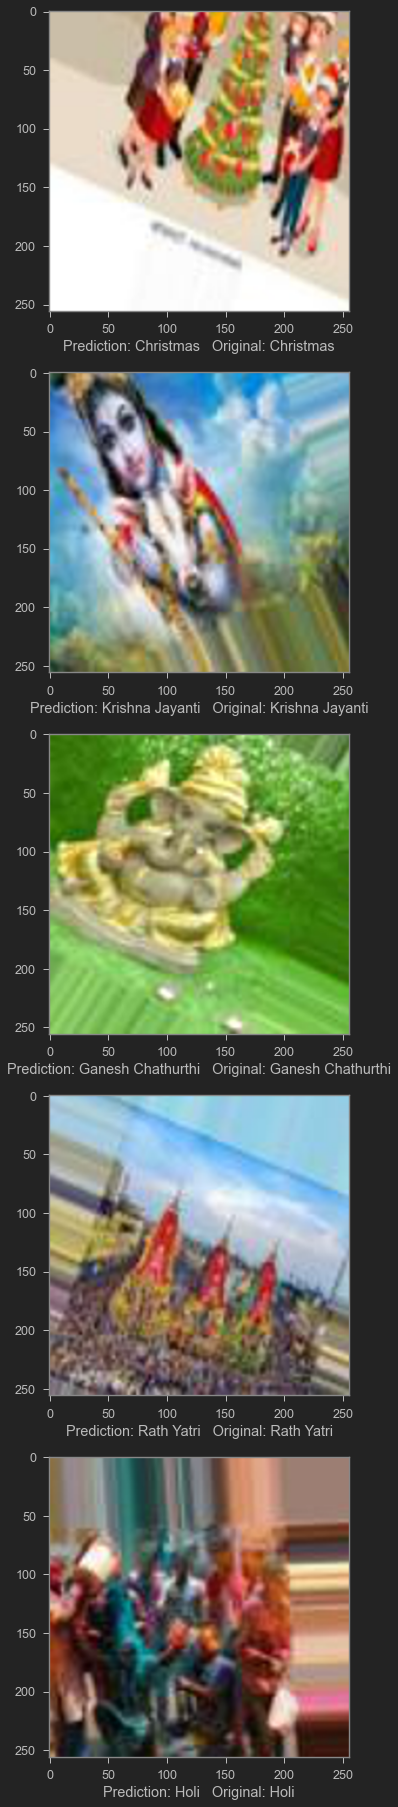

In [33]:
  import random
  fig=plt.figure(figsize = (100,100))
  for i in range(5):
      j = random.randint(0,len(image))
      fig.add_subplot(20, 1, i+1)
      plt.xlabel("Prediction: " + prediction[j] +"   Original: " + original[j])
      plt.imshow(image[j])
  fig.tight_layout()
  plt.show()

In [34]:
print(classification_report(np.asarray(original), np.asarray(prediction)))

                          precision    recall  f1-score   support

 Agitagueda art festival       1.00      0.99      1.00      1062
                Baisakhi       0.94      0.98      0.96       859
                Bhandara       1.00      1.00      1.00       982
                    Bihu       0.99      0.99      0.99       961
            Chapchar Kut       0.00      0.00      0.00         0
            Chapchar kut       0.00      0.00      0.00       294
               Christmas       0.95      0.90      0.93       612
                  Diwali       0.98      0.98      0.98       633
       Ganesh Chathurthi       0.92      0.91      0.92       798
                    Holi       0.94      0.97      0.95       812
Jaipur Elephant Festival       0.00      0.00      0.00      1059
Jaipur Elephant festival       0.00      0.00      0.00         0
         Krishna Jayanti       0.97      0.93      0.95       583
               Kumbhmela       0.95      0.97      0.96       678
        L

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



Text(0.5, 1.0, 'Confusion_matrix')

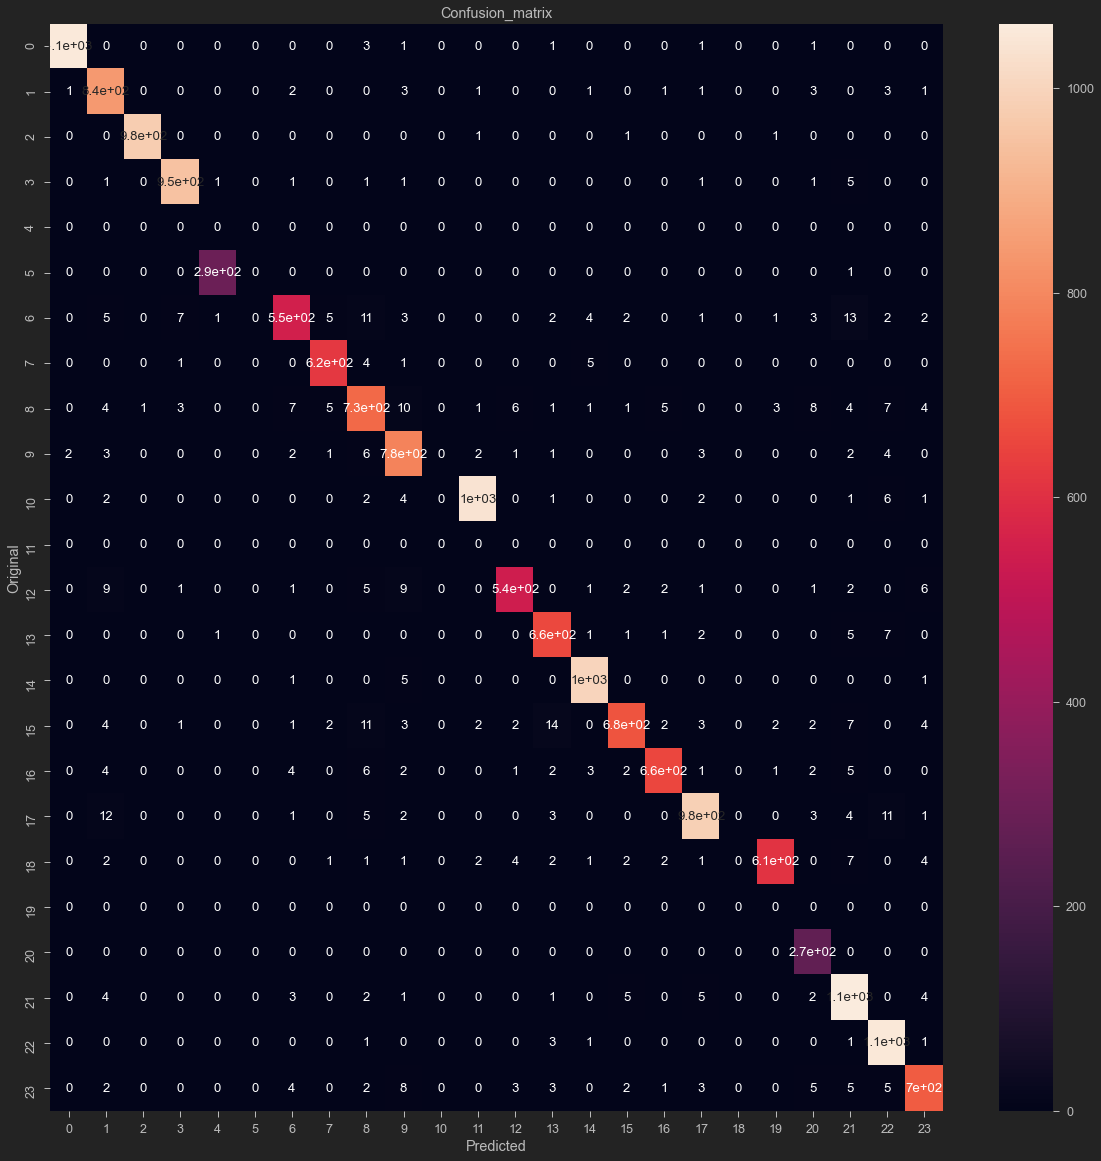

In [35]:
plt.figure(figsize = (20,20))
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')